# **ABC _TECH-PM-PR-0012**

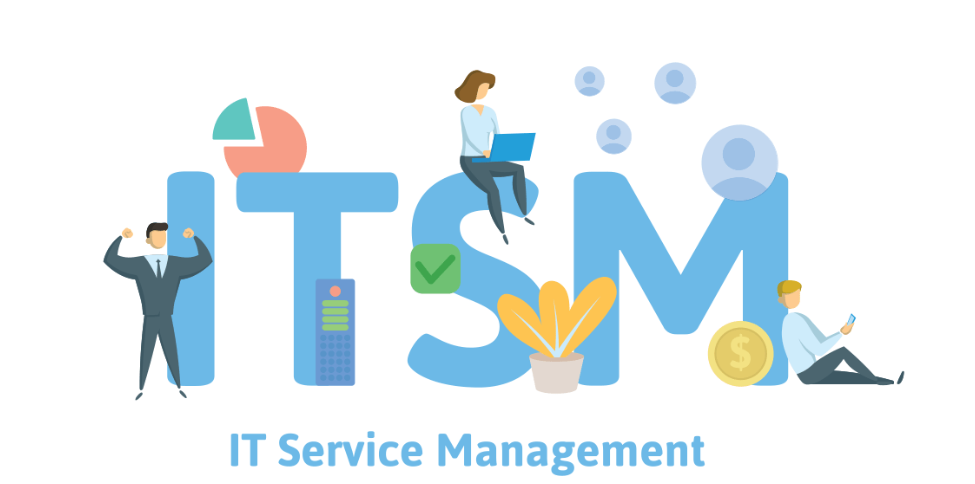

## ITSM Improvement through Machine Learning: Enhancing Incident Management at ABC Tech.

### PROBLEM OF STATEMENT:

*  Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces

*  Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared with resources and technology planning

*  Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.

*  Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

### Business Case Description:

ABC Tech is an established mid-sized organization operating in the IT-enabled business sector for over a decade. They manage a significant volume of IT incidents and tickets, averaging between 22,000 to 25,000 per year. ABC Tech follows best practices in IT Service Management (ITSM), including incident management, problem management, change management, and configuration management processes. These ITIL practices have matured over time, reaching a high level of process maturity.

Recently, ABC Tech conducted an audit that indicated that further improvement initiatives in their ITSM processes may not provide a sufficient return on investment (ROI). Despite their mature processes, customer feedback from recent surveys has revealed that incident management, in particular, is rated poorly, suggesting there is room for enhancement.

In response to these challenges, ABC Tech's management has decided to explore the potential of machine learning (ML) to enhance their ITSM processes. After attending a Machine Learning conference focused on IT Service Management (ITSM), they identified four key areas where ML can contribute to improving ITSM processes within the organization:

####   1.    Predicting High Priority Tickets: ABC Tech aims to develop an ML model that can predict high-priority tickets, specifically                       those categorized as priority 1 and 2. This prediction will allow them to take proactive measures to address issues or                               incidents before they escalate.
####   2.     Forecasting Incident Volume: The organization plans to use ML to forecast the incident volume in different fields on a                            quarterly and annual basis. This predictive capability will help them better allocate resources and plan for the required                            technology upgrades.   
####   3.     Auto-Tagging Tickets: ABC Tech intends to implement a text classification ML model to automatically assign correct                                priorities and  departments to incoming tickets. This automation will reduce reassignment and related delays in ticket                              handling.
####   4.   Predict RFC (Request for change) and possible failure /misconfiguration of ITSM assets: The organization aims to create                        predictive models for Request for  Change (RFC) and detect potential failures or misconfigurations in ITSM assets.                                  Identifying these issues in advance will help in preventing disruptions and improving overall ITSM asset management.

The dataset that ABC Tech plans to use for these ML initiatives comprises a total of approximately 46,000 records spanning the years 2012, 2013, and 2014. The data is stored in a MySQL database with read-only access, and the relevant connection details are provided.

#### Here's a summary of some key fields in the dataset:

* CI_Name: Configuration Item Name
    
* CI_Cat: Configuration Item Category
    
* CI_Subcat: Configuration Item Subcategory

* Incident_ID: Incident Identifier
    
* Status: Incident Status (e.g., Closed)
    
* Impact: Impact level
    
* Urgency: Urgency level
    
* Priority: Incident Priority
    
* Category: Incident Category
    
* KB_number: Knowledge Base Number
    
* Alert_Status: Alert Status
    
* No_of_Reassignments: Number of Reassignments
    
* Open_Time: Incident Open Time
    
* Reopen_Time: Incident Reopen Time
    
* Resolved_Time: Incident Resolved Time
    
* Close_Time: Incident Close Time
    
* Handle_Time_hrs: Time taken to handle the incident (in hours)
    
* Closure_Code: Code for incident closure
    
* No_of_Related_Interactions: Number of Related Interactions
    
* Related_Interaction: Identifier for Related Interaction
    
* No_of_Related_Incidents: Number of Related Incidents
    
* No_of_Related_Changes: Number of Related Changes
    
* Related_Change: Identifier for Related Change


In [ ]:
#!pip install pymysql
#!pip install mysql_connector

In [ ]:
# Importing Necessary Libraries:
import mysql.connector
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Making Connection to  Database Server
connection = mysql.connector.connect(host='18.136.157.135',
                                     user = 'dm_team',
                                     password = 'DM!$Team@&27920!',
                                     database = 'project_itsm' )

In [ ]:
# Checking no.of database connected/available on server
cursor = connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_itsm',)


In [ ]:
# Checking no.of Tables Present inside the Given database
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_itsm
0           dataset_list


In [ ]:
# Selecting all the records from the given table
query = "select * from dataset_list"
data = pd.read_sql(query,connection)
data

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,


In [ ]:
# The table (dataset_list) contains 46606 rows & 25 columns.

# Domain Analysis:
Certainly! Domain analysis is an essential step in any data science or machine learning project. It involves gaining a deep understanding of the domain-specific aspects of the problem you're trying to solve. In this case, we're analyzing the domain of IT Service Management (ITSM) within the context of ABC Tech's business case. Here's a domain analysis for ITSM:

#### 1. IT Service Management (ITSM):

###### Definition:   
IT Service Management (ITSM) refers to a set of practices and processes used by organizations to design, deliver, manage, and improve IT services for their customers and end-users.
###### Importance:
ITSM ensures that IT services are aligned with business goals, reliable, and efficiently delivered, leading to enhanced customer satisfaction and business performance.
#### 2. Incident Management:

###### Definition:
Incident Management is a core ITSM process that involves identifying, categorizing, prioritizing, and resolving incidents to restore normal service operations as quickly as possible.
###### Challenges:
Common challenges in incident management include handling a high volume of incidents, determining incident priorities, minimizing response times, and reducing the impact on end-users.
#### 3. Priority in ITSM:

###### Definition:
Priority is a classification system used to categorize incidents based on their severity and impact on business operations. In ITIL (IT Infrastructure Library) framework, there are typically four priority levels: Priority 1 (Critical), Priority 2 (High), Priority 3 (Medium), and Priority 4 (Low).
###### Importance:
Prioritizing incidents helps organizations allocate resources effectively and respond to critical issues promptly.
#### 4. ITIL Framework:

###### Definition:
ITIL is a widely adopted framework for ITSM that provides best practices and guidelines for managing IT services, including incident management, problem management, change management, and configuration management.
###### Maturity Levels:
ITIL processes can mature over time, starting from ad-hoc practices and progressing to well-defined, controlled, and optimized processes. A mature ITIL framework leads to improved service quality and efficiency.
#### 5. Machine Learning in ITSM:

###### Application:
Machine learning can be applied to ITSM processes to predict incidents, automate ticket classification, forecast resource needs, and detect anomalies or misconfigurations in IT assets.
###### Benefits:
ML can enhance incident response, reduce manual workload, improve service quality, and proactively identify issues before they impact operations.


# Basic Checks:

In [ ]:
data.head()# shows top 5 records of dataset.

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,


In [ ]:
data.tail() # shows last 5 records of dataset.

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,,31-03-2014 16:29,31-03-2014 16:29,"0,095",Other,1,SD0147021,,,
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,,31-03-2014 15:29,31-03-2014 15:29,"0,428333333",User error,1,SD0146967,,,
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,,31-03-2014 15:32,31-03-2014 15:32,"0,071666667",Hardware,1,SD0146982,,,
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,,31-03-2014 15:42,31-03-2014 15:42,"0,116944444",Software,1,SD0146986,,,
46605,DCE000077,hardware,DataCenterEquipment,WBS000267,IM0047057,Closed,3,3,3,0.902319509,...,,31-03-2014 22:47,31-03-2014 22:47,"0,586388889",Hardware,1,SD0147088,,,


In [ ]:
data.info() # It gives infomation about total no.of rows & columns,name & datatypes of all features.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

In [ ]:
#Insights:
#1. The dataset contains 46606 rows & 25 columns.
#2. All the features are object type.

In [ ]:
print(data.isnull().sum()) # Checking the sum of null values present in each column.


CI_Name                       0
CI_Cat                        0
CI_Subcat                     0
WBS                           0
Incident_ID                   0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
KB_number                     0
Alert_Status                  0
No_of_Reassignments           0
Open_Time                     0
Reopen_Time                   0
Resolved_Time                 0
Close_Time                    0
Handle_Time_hrs               0
Closure_Code                  0
No_of_Related_Interactions    0
Related_Interaction           0
No_of_Related_Incidents       0
No_of_Related_Changes         0
Related_Change                0
dtype: int64


In [ ]:
# No null values  are present in the dataset.

In [ ]:
data.describe() # It gives the stastical infomations.

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
count,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606,...,46606,46606,46606,46606,46606,46606,46606,46606,46606,46606
unique,3019,13,65,274,46606,2,6,6,6,46606,...,2245,33628,34528,30639,15,50,43060,25,5,233
top,SUB000456,application,Server Based Application,WBS000073,IM0000004,Closed,4,4,4,0.601292279,...,,,02-10-2013 15:20,0,Other,1,#MULTIVALUE,,,
freq,3050,32900,18811,13342,1,46597,22556,22588,22717,1,...,44322,1780,21,236,16470,43058,3434,45384,46046,46046


In [ ]:
data.shape # It shows the shape of dataset.

(46606, 25)

In [ ]:
df=data.copy() # Make copy of dataset

In [ ]:
df.shape

(46606, 25)

In [ ]:
data.columns # Shows all column's name present in the dataset.

Index(['CI_Name', 'CI_Cat', 'CI_Subcat', 'WBS', 'Incident_ID', 'Status',
       'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category', 'KB_number',
       'Alert_Status', 'No_of_Reassignments', 'Open_Time', 'Reopen_Time',
       'Resolved_Time', 'Close_Time', 'Handle_Time_hrs', 'Closure_Code',
       'No_of_Related_Interactions', 'Related_Interaction',
       'No_of_Related_Incidents', 'No_of_Related_Changes', 'Related_Change'],
      dtype='object')

In [ ]:
data.shape

(46606, 25)

In [ ]:
# Dropping some unnecessary columns which does not impact on ticket priority(output feature).
data.drop(["CI_Name", "WBS", "Incident_ID", "KB_number", "Related_Interaction","Related_Change"], axis=1, inplace=True)

In [ ]:
data.shape

(46606, 19)

In [ ]:
data.columns

Index(['CI_Cat', 'CI_Subcat', 'Status', 'Impact', 'Urgency', 'Priority',
       'number_cnt', 'Category', 'Alert_Status', 'No_of_Reassignments',
       'Open_Time', 'Reopen_Time', 'Resolved_Time', 'Close_Time',
       'Handle_Time_hrs', 'Closure_Code', 'No_of_Related_Interactions',
       'No_of_Related_Incidents', 'No_of_Related_Changes'],
      dtype='object')

In [ ]:
# Define categorical,numerical and datatime  columns:
categorical_columns = ['CI_Cat', 'CI_Subcat', 'Status','Impact', 'Urgency' ,'Category',
       'Alert_Status', 'Closure_Code']

numerical_columns=['Priority', 'number_cnt', 'No_of_Reassignments',
                   'No_of_Related_Interactions', 'No_of_Related_Incidents',
       'No_of_Related_Changes']

datetime_columns=['Open_Time', 'Reopen_Time', 'Resolved_Time',
       'Close_Time', 'Handle_Time_hrs',]

# Convert categorical columns to 'object' dtype
data[categorical_columns] = data[categorical_columns].astype('object')

# Convert numerical columns to 'float' or 'int' dtype (coerce errors for invalid parsing)
data[numerical_columns] = data[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Convert time columns to 'datetime' dtype
data[datetime_columns]=data[datetime_columns].apply(pd.to_datetime,errors='coerce')


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Cat                      46606 non-null  object        
 1   CI_Subcat                   46606 non-null  object        
 2   Status                      46606 non-null  object        
 3   Impact                      46606 non-null  object        
 4   Urgency                     46606 non-null  object        
 5   Priority                    45226 non-null  float64       
 6   number_cnt                  46606 non-null  float64       
 7   Category                    46606 non-null  object        
 8   Alert_Status                46606 non-null  object        
 9   No_of_Reassignments         46605 non-null  float64       
 10  Open_Time                   18612 non-null  datetime64[ns]
 11  Reopen_Time                 871 non-null    datetime64

In [ ]:
# Print unique values for each categorical feature:
for i in categorical_columns:
    print(i,data[i].unique())
    print(data[i].value_counts())
    print("----------------------------")

CI_Cat ['subapplication' 'application' 'computer' '' 'displaydevice' 'software'
 'storage' 'database' 'hardware' 'officeelectronics' 'networkcomponents'
 'applicationcomponent' 'Phone']
CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
                          111
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64
----------------------------
CI_Subcat ['Web Based Application' 'Desktop Application' 'Server Based Application'
 'SAP' 'Client Based Application' 'Citrix' 'Standard Application'
 'Windows Server' 'Laptop' 'Linux Server' '' 'Monitor'
 'Automation Software' 'SAN' 'Banking Device' 'Desktop' 'Database'
 'Oracle Server' 'Keyboard' 'Printer' 'Exchange' 'System Software' 'VDI'
 'Encryption' 'Om

In [ ]:
data.describe().T # Stastical infomations about numerical features.

,count,mean,min,25%,50%,75%,max,std
Priority,45226.0,4.215805,1.0,4.0,4.0,5.0,5.0,0.705624
number_cnt,46606.0,0.499658,0.000023,0.248213,0.500269,0.749094,0.999997,0.288634
No_of_Reassignments,46605.0,1.131831,0.0,0.0,0.0,2.0,46.0,2.269774
Open_Time,18612,2013-12-10 03:34:32.927143680,2012-01-10 10:49:00,2013-06-11 11:40:45,2013-11-12 13:00:30,2014-06-02 18:22:30,2014-12-03 22:58:00,NaN
Reopen_Time,871,2013-12-11 16:45:50.493685504,2013-01-10 09:58:00,2013-06-12 13:19:30,2013-11-11 14:15:00,2014-06-03 13:45:30,2014-12-03 17:24:00,NaN
Resolved_Time,17577,2013-12-16 11:14:11.138419200,2013-01-10 06:45:00,2013-06-11 14:56:00,2013-12-11 08:38:00,2014-06-03 15:03:00,2014-12-03 17:56:00,NaN
Close_Time,18333,2013-12-15 14:00:49.795450880,2013-01-10 06:45:00,2013-06-11 13:59:00,2013-12-11 07:53:00,2014-06-03 14:27:00,2014-12-03 17:56:00,NaN
Handle_Time_hrs,490,2030-04-19 02:24:00.000000256,1974-01-01 00:00:00,1995-04-08 12:00:00,2040-01-01 00:00:00,2054-03-01 00:00:00,2073-05-01 00:00:00,NaN
No_of_Related_Interactions,46492.0,1.149897,1.0,1.0,1.0,1.0,370.0,2.556338
No_of_Related_Incidents,1222.0,1.669394,1.0,1.0,1.0,1.0,63.0,3.339687


In [ ]:
data.describe(include="object") # Stastical infomation about categorical features.

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Category,Alert_Status,Closure_Code
count,46606,46606,46606,46606,46606,46606,46606,46606
unique,13,65,2,6,6,4,1,15
top,application,Server Based Application,Closed,4,4,incident,closed,Other
freq,32900,18811,46597,22556,22588,37748,46606,16470


In [ ]:
# Unique value will be 1 for constant column.Here, Alert_Status is the constant feature. so we drop the column.
data.drop(["Alert_Status"],axis=1,inplace=True)

In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,subapplication,Web Based Application,Closed,4,4,4.0,0.601292,incident,26.0,2012-05-02 13:32:00,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,2.0,NaN
1,application,Web Based Application,Closed,3,3,3.0,0.415050,incident,33.0,2012-12-03 15:44:00,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,NaT,Software,1.0,1.0,NaN
2,application,Desktop Application,Closed,NS,3,NaN,0.517551,request for information,3.0,NaT,NaT,NaT,NaT,NaT,No error - works as designed,1.0,NaN,NaN
3,application,Web Based Application,Closed,4,4,4.0,0.642927,incident,13.0,NaT,NaT,NaT,NaT,NaT,Operator error,1.0,NaN,NaN
4,application,Web Based Application,Closed,4,4,4.0,0.345258,incident,2.0,2012-10-08 11:01:00,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,NaT,Other,1.0,NaN,NaN


# Basic Checks Report:
## Overview:
When working with IT Service Management (ITSM) data or any dataset, it's essential to perform basic data checks to ensure the quality and integrity of the data. These basic checks help identify issues early on and ensure that our analysis or project is based on reliable data.

### Data Shape:
We Check the dimensions of the dataset, i.e., the number of rows and columns, using data.shape. Data Contains 46606 Rows and 25 columns. Data Types: We Verified that the data types of each column. All columns are in object.
Then we separate categorical columns and numerical columns.
### Descriptive Statistics:
We Used data.describe().T to get summary statistics (mean, min, max, etc.) for numerical columns. Use data.describe(include='O').T for a summary of categorical columns.

### Unique Values:
Checked the number of unique values in categorical columns using for loop for categorical columns i.e data[i].unique(). Here, One constant columns are there. so we dropped that column.

### Value Counts:
Examined the distribution of categorical values using for loop by data[i].value_counts().

The goal is to ensure that our data is clean, complete, and suitable for analysis or further processing.

# Exploratory Data Analysis
#### * Univariate Analysis
#### * Bivariate Analysis
#### * Multivarite Analysis

## Univariate Analysis:

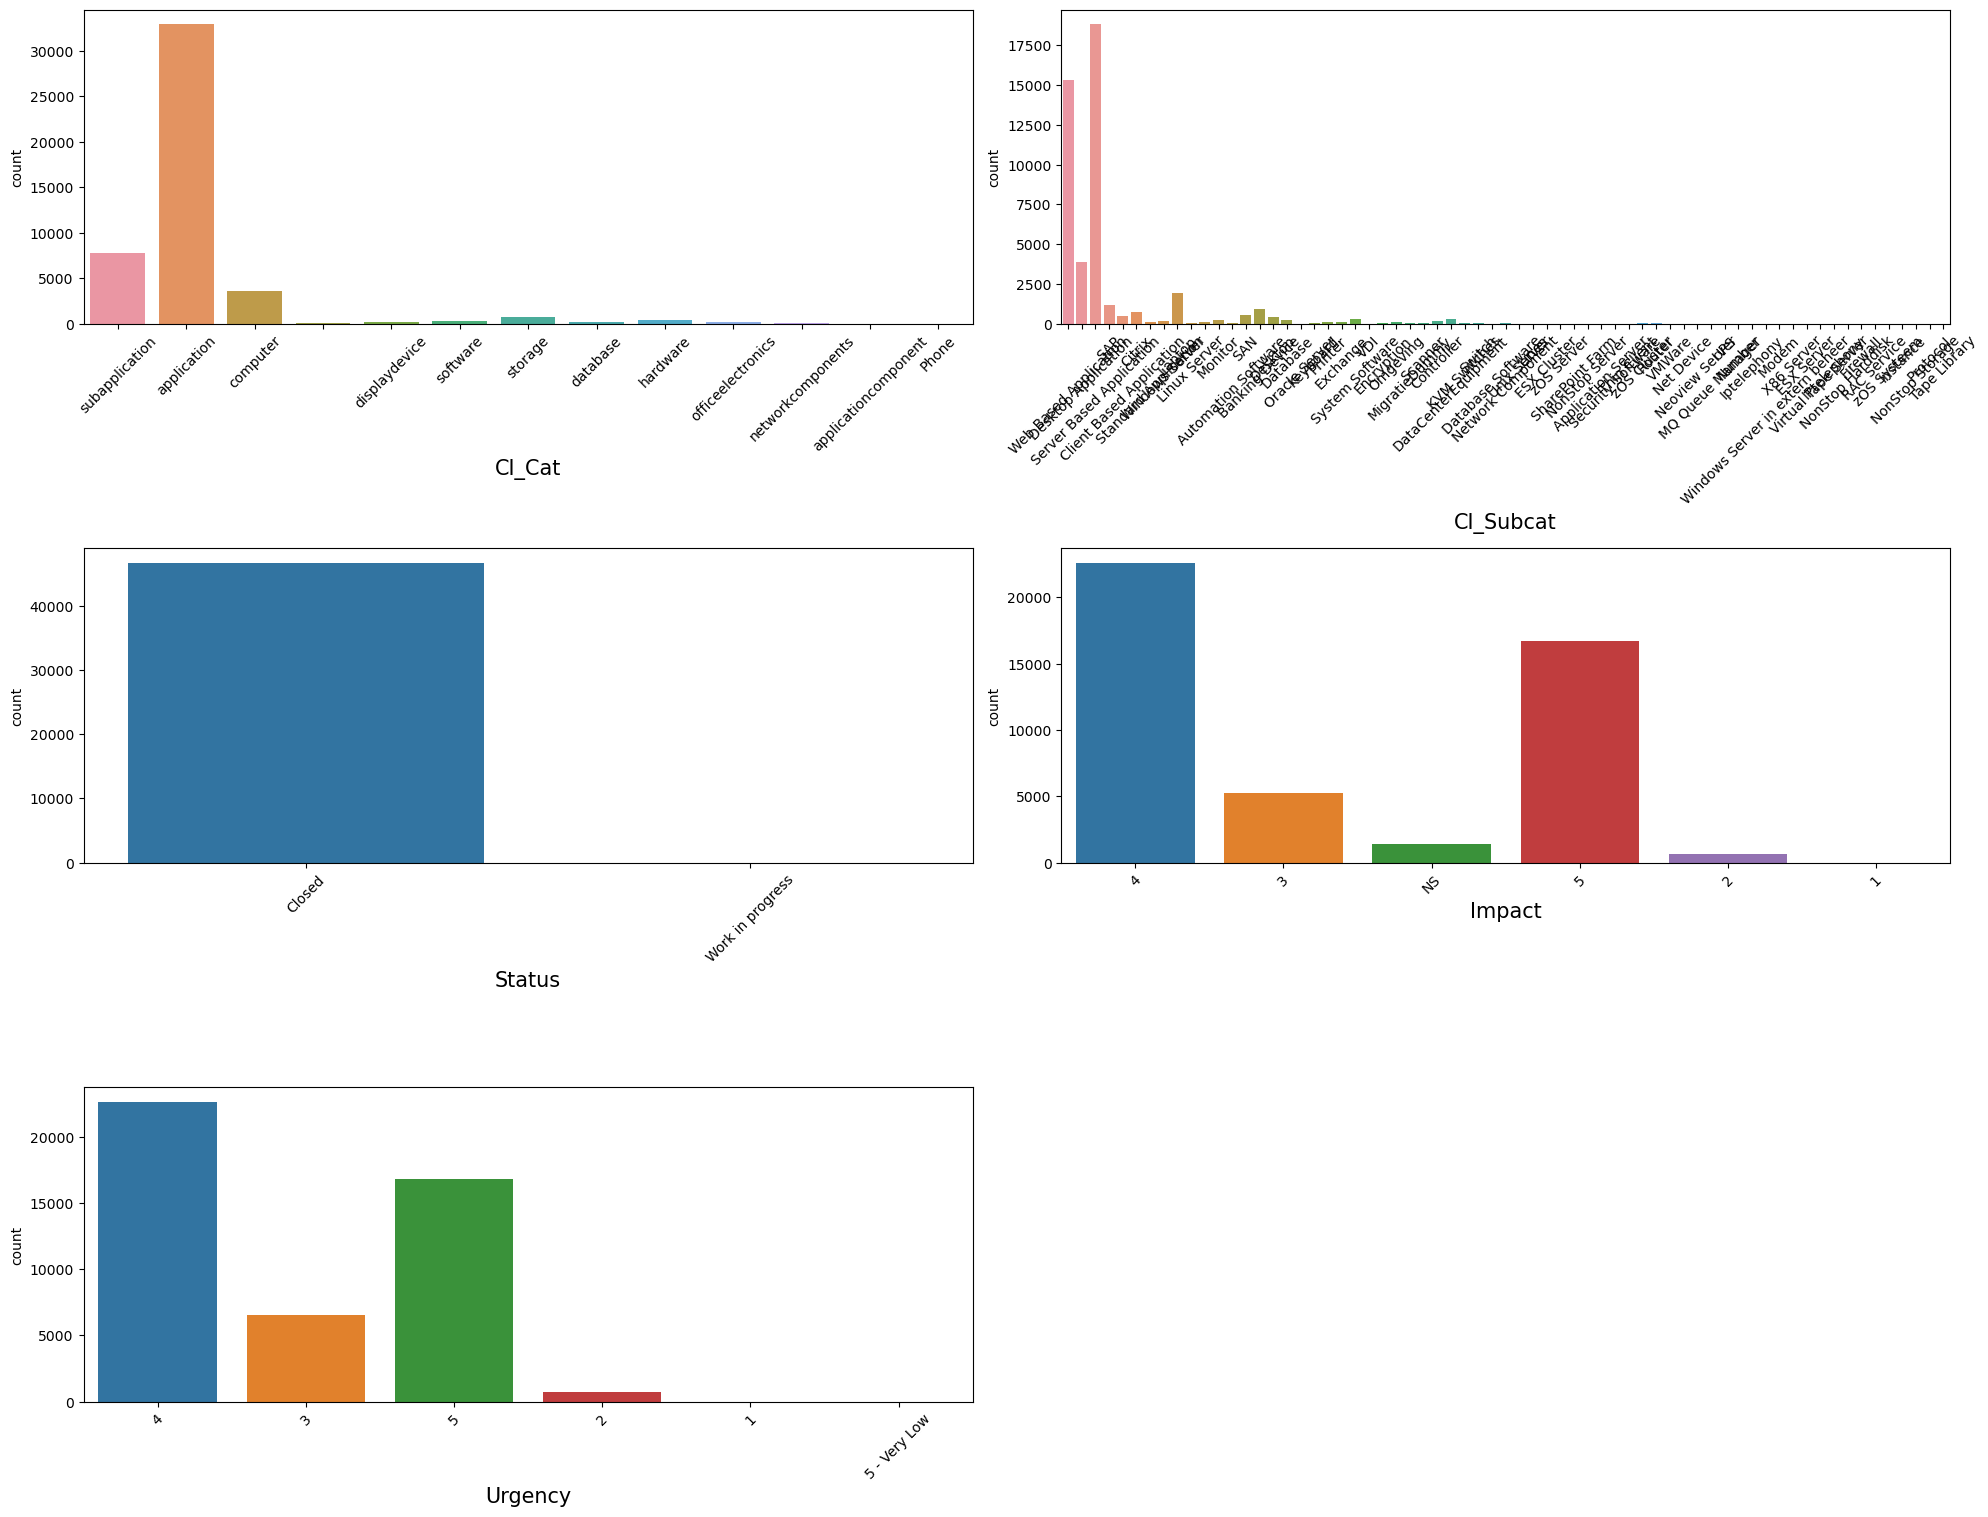

In [ ]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in data.columns:
    if plotnumber <= 5:
# Check if the column is categorical
        if data[column].dtype == 'object':
            ax = plt.subplot(5,2,plotnumber)
            sns.countplot(x=data[column])
            plt.xlabel(column,fontsize=15)
            plt.xticks(rotation=45)
            plotnumber+=1
plt.tight_layout()


## Insights:

*  In CI_cat, it is found that the application is having more count compared to others.

* The Status of almost all of tickets is in closed state.

* In the impact and urgency  columns most of the tickets are having imapct and urgency of either 4 or 5.



##  Bivariate Analysis:¶

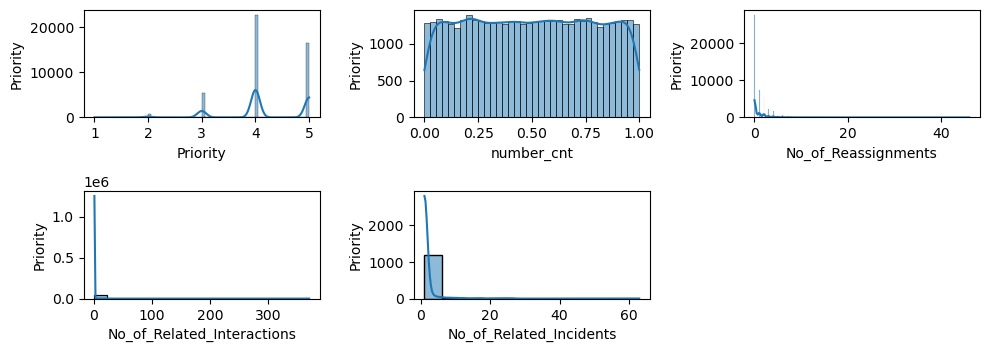

In [ ]:
## This is for Numerical data correlated with target column:
plt.figure(figsize=(10, 5), facecolor='white')
plotnumber = 1

for column in data.columns:
    if plotnumber <= 5:
        # Check if the column is numerical
        if data[column].dtype in ['int64', 'float64']:
            ax = plt.subplot(3, 3, plotnumber)
            sns.histplot(x=data[column], kde=True)
            plt.xlabel(column, fontsize=10)
            plt.ylabel("Priority", fontsize=10)
            plotnumber += 1

plt.tight_layout()


####  Insights:
* No_of_Reassignments column indicating that most of the tickets solved at first assignment.
* Reassignments decrease exponentially.
* The graph is skewed to the right, meaning more tickets have a few reassignments than many reassignments.
* Median number of related interactions is 1.
* 75% of tickets have 3 or fewer related interactions.
* There are a few outliers with many related interactions (up to 20).  
* The distribution of the number of related incidents is skewed to the right, meaning that there are more incidents with fewer related incidents than incidents with more related incidents.         

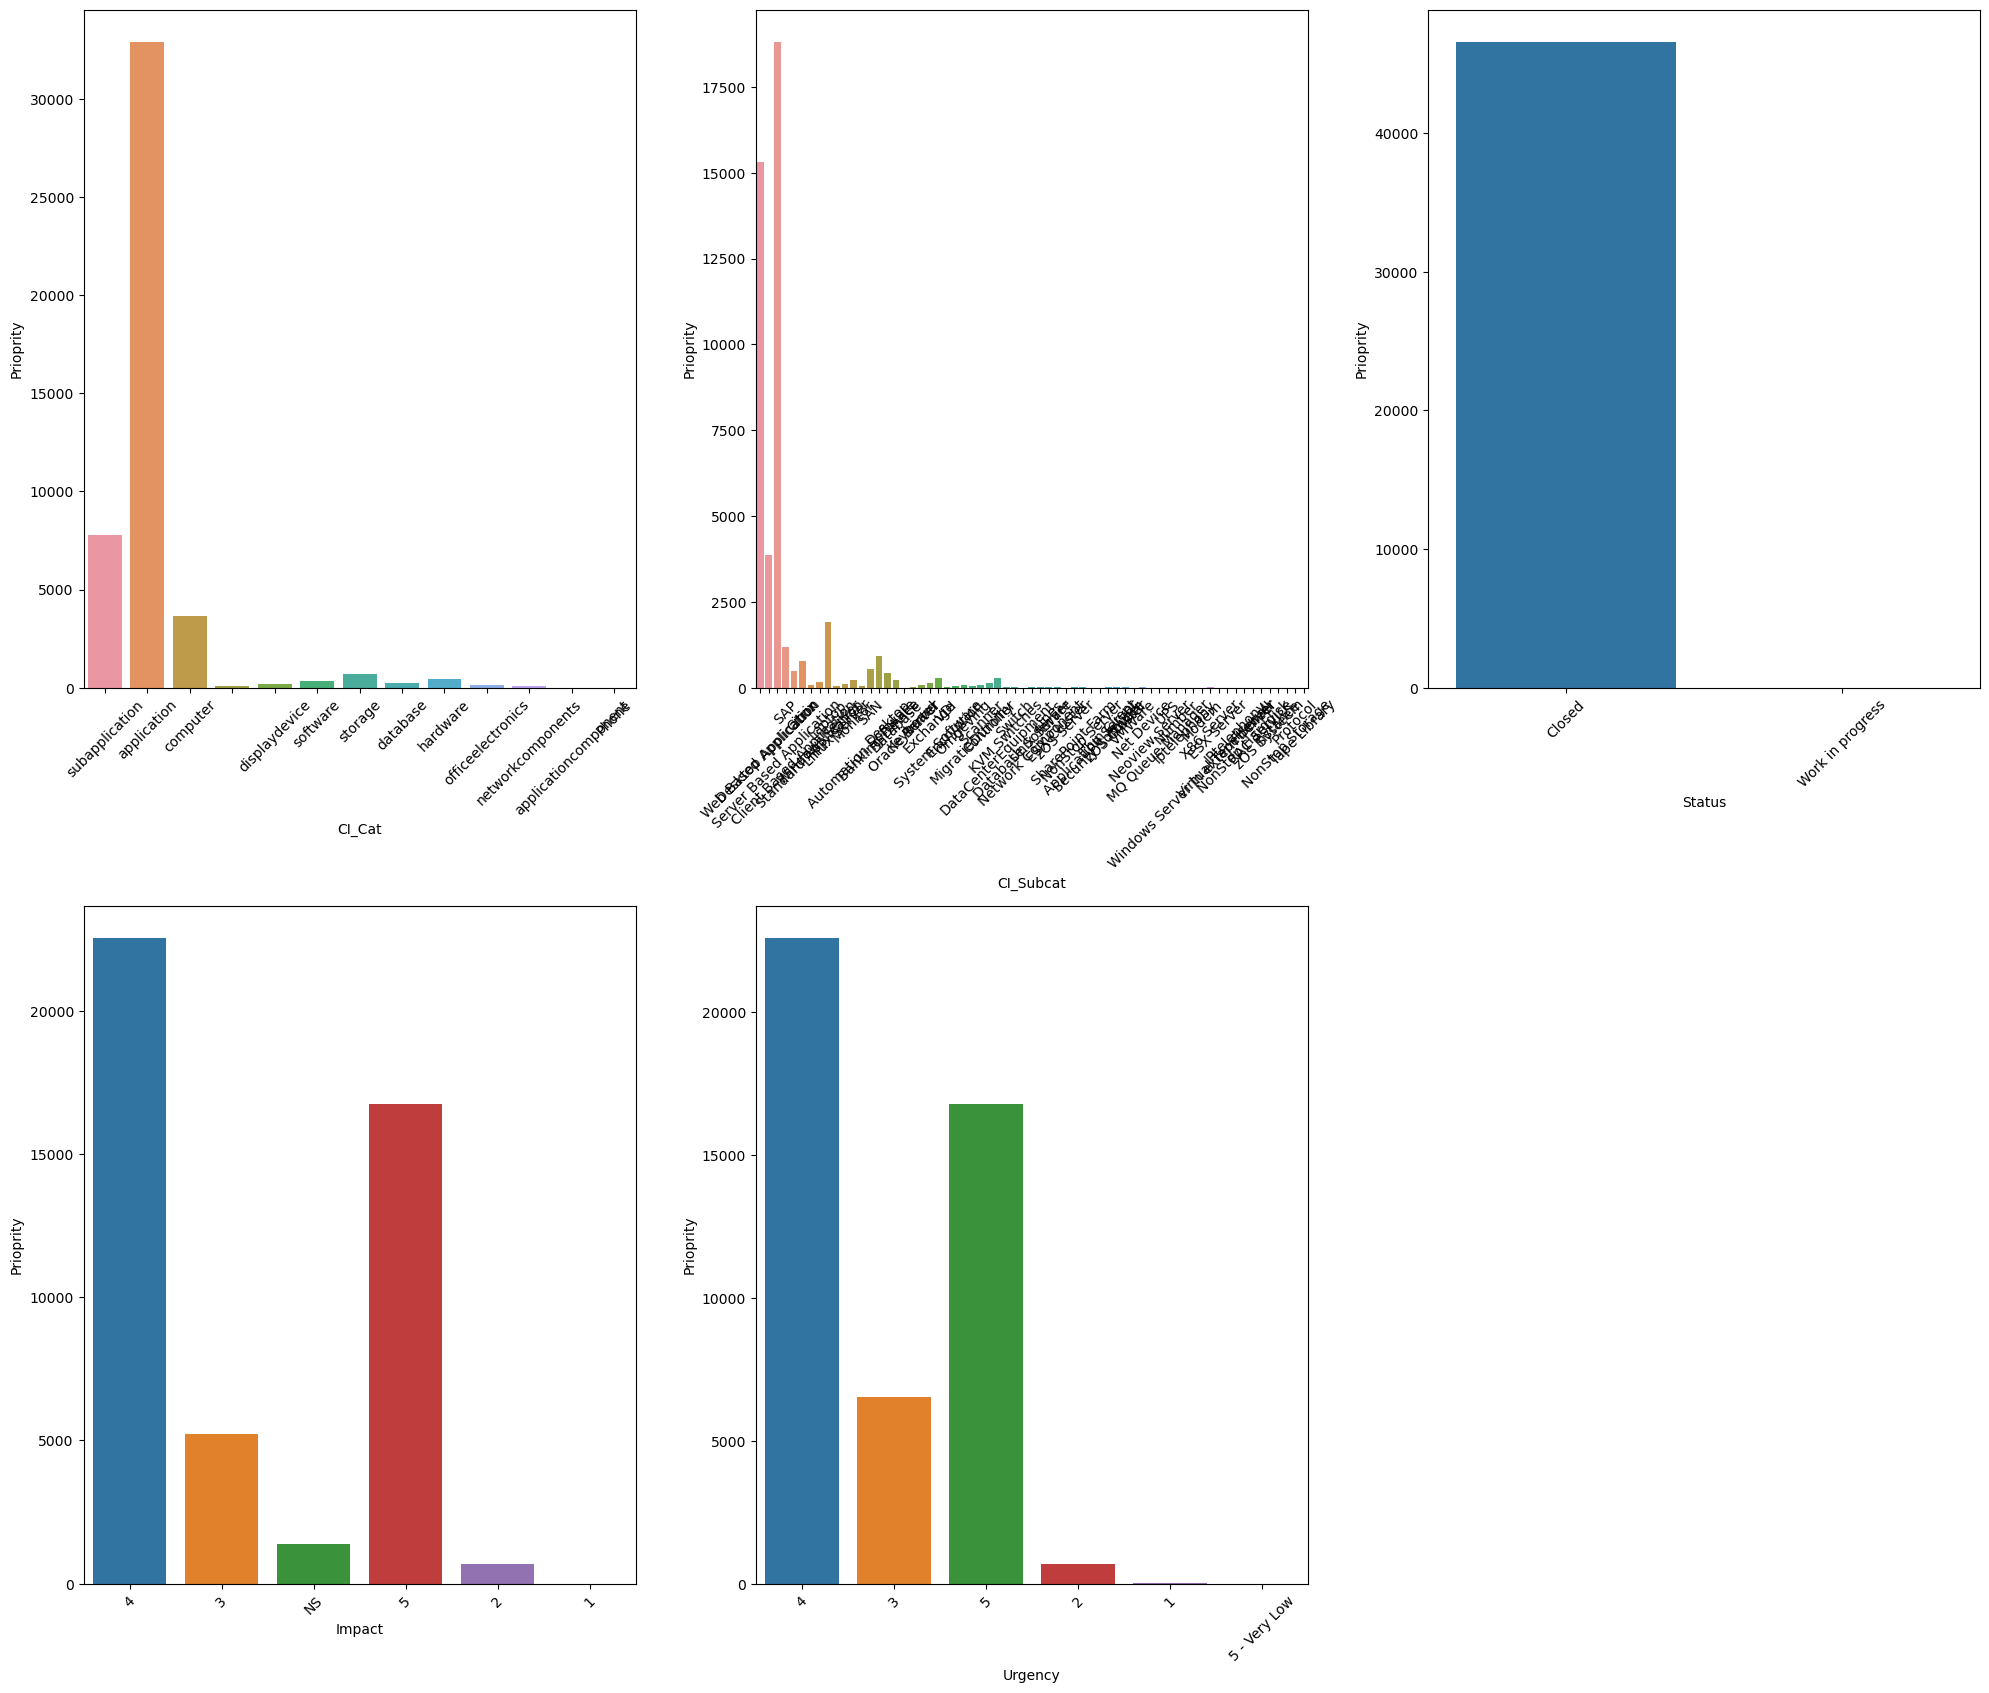

In [ ]:
## This is for categorical data correlated with target column:
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in data.columns:
    if plotnumber <= 5:
        # Check if the column is categorical
        if data[column].dtype == 'object':
            ax = plt.subplot(3, 3, plotnumber)
            sns.countplot(x=data[column])
            plt.xlabel(column, fontsize=10)
            plt.ylabel("Prioprity", fontsize=10)
            plt.xticks(rotation=45)
            plotnumber += 1

plt.tight_layout()

#### Insights:
* In CI_cat, it is found that the application is having more prority count compared to others.

* The Status of almost all of tickets is in closed state.

* In the impact and urgency columns most of the tickets are having imapct and urgency of either 4 or 5.
    

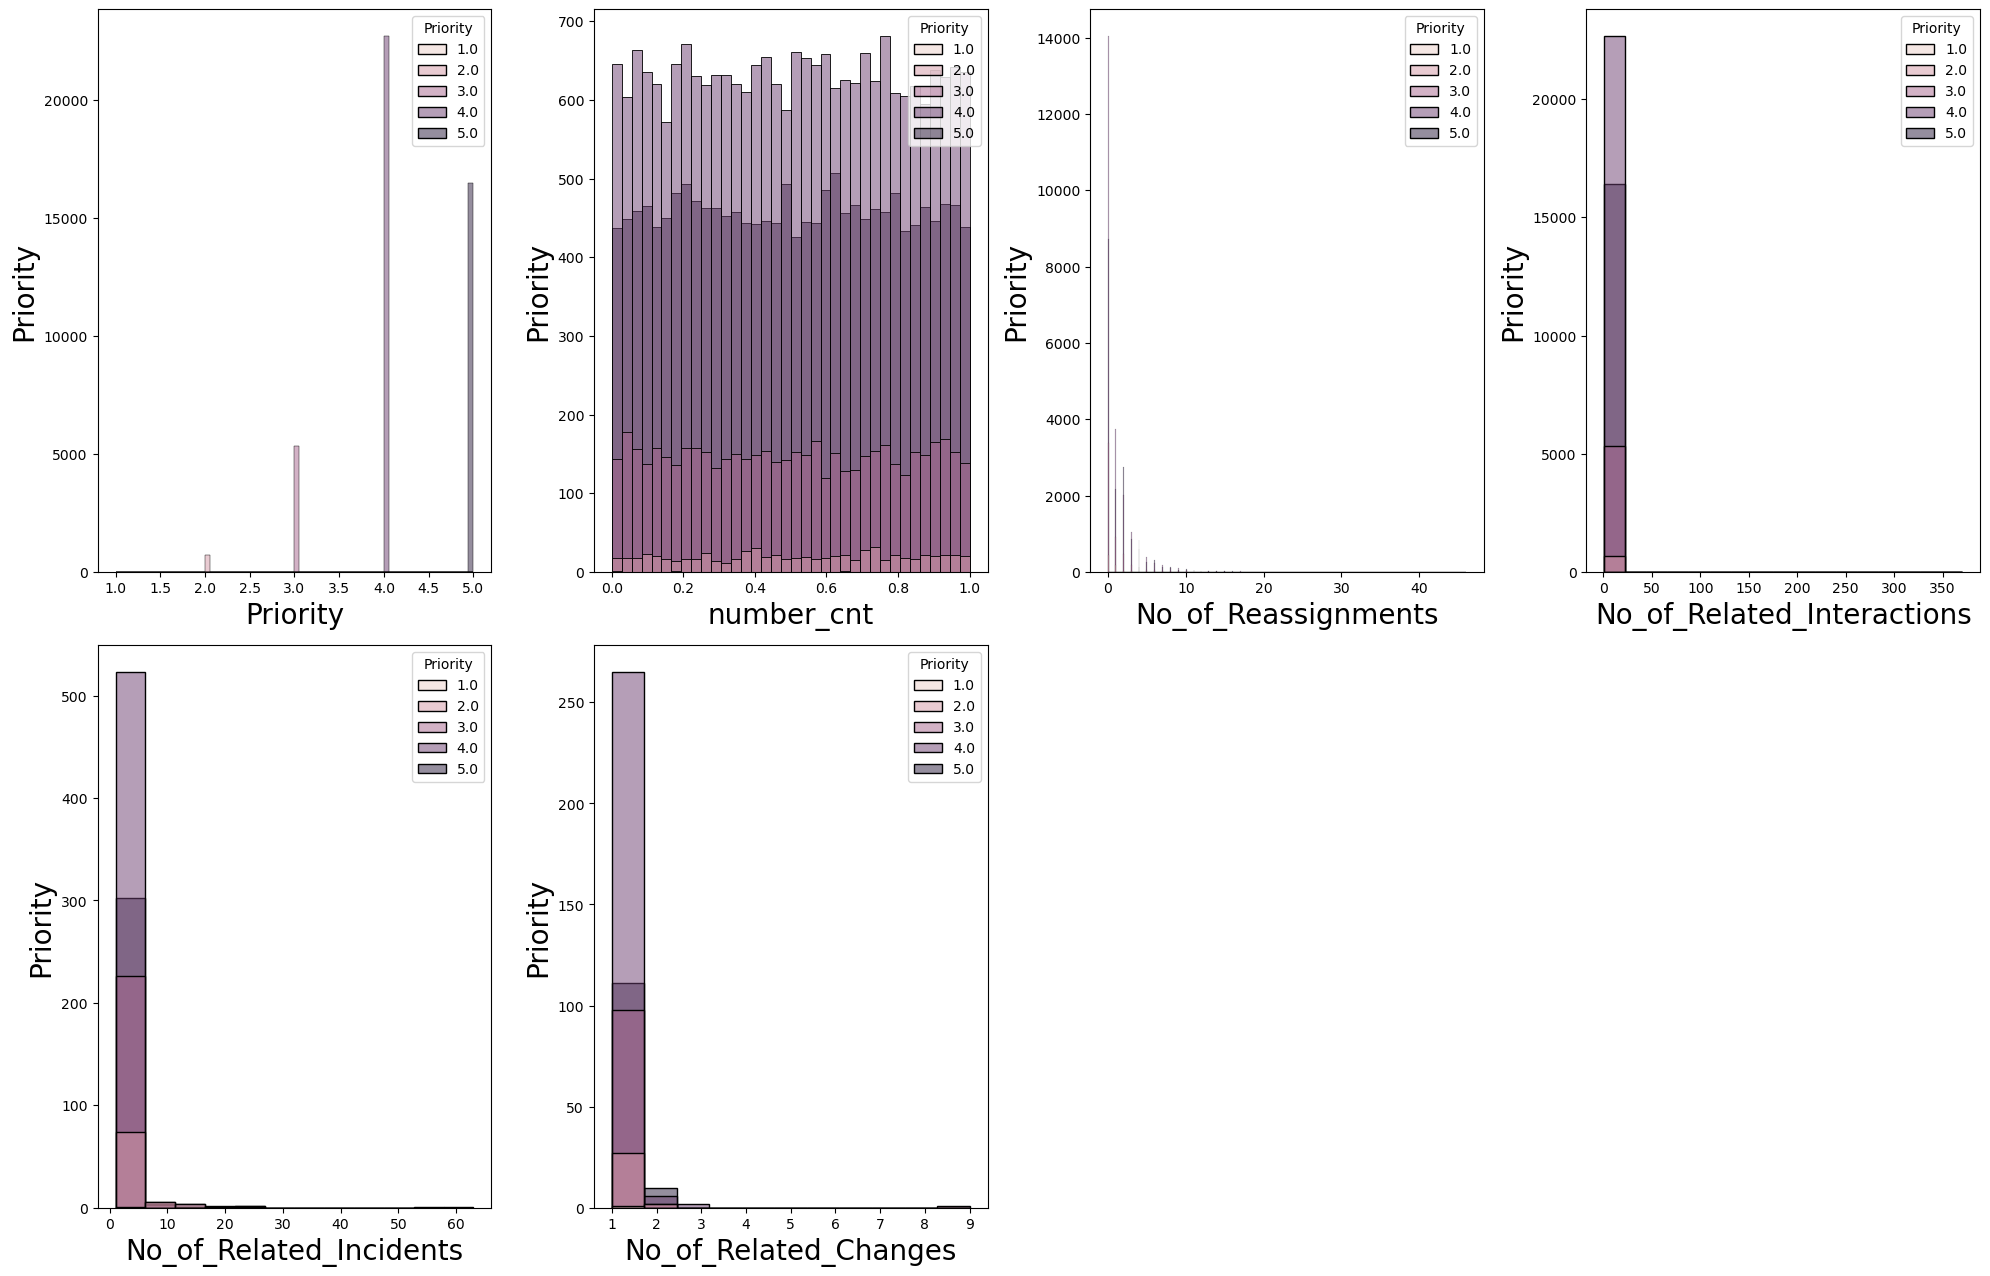

In [ ]:
plt.figure(figsize=(20, 25), facecolor='white')
plotnumber = 1

for column in data.columns:
    if plotnumber <= 16:
        # Check if the column contains numeric data
        if data[column].dtype in ['int64', 'float64']:
            ax = plt.subplot(4, 4, plotnumber)
            sns.histplot(x=data[column], hue=data.Priority)
            plt.xlabel(column, fontsize=20)
            plt.ylabel('Priority', fontsize=20)
            plotnumber += 1

plt.tight_layout()

#### Insights:

* The most common number of related changes is 1.
* There are more changes with fewer related changes than changes with more related changes.
* The median number of related changes is 2


##  Multivarite Analysis:

<Figure size 4000x4500 with 0 Axes>

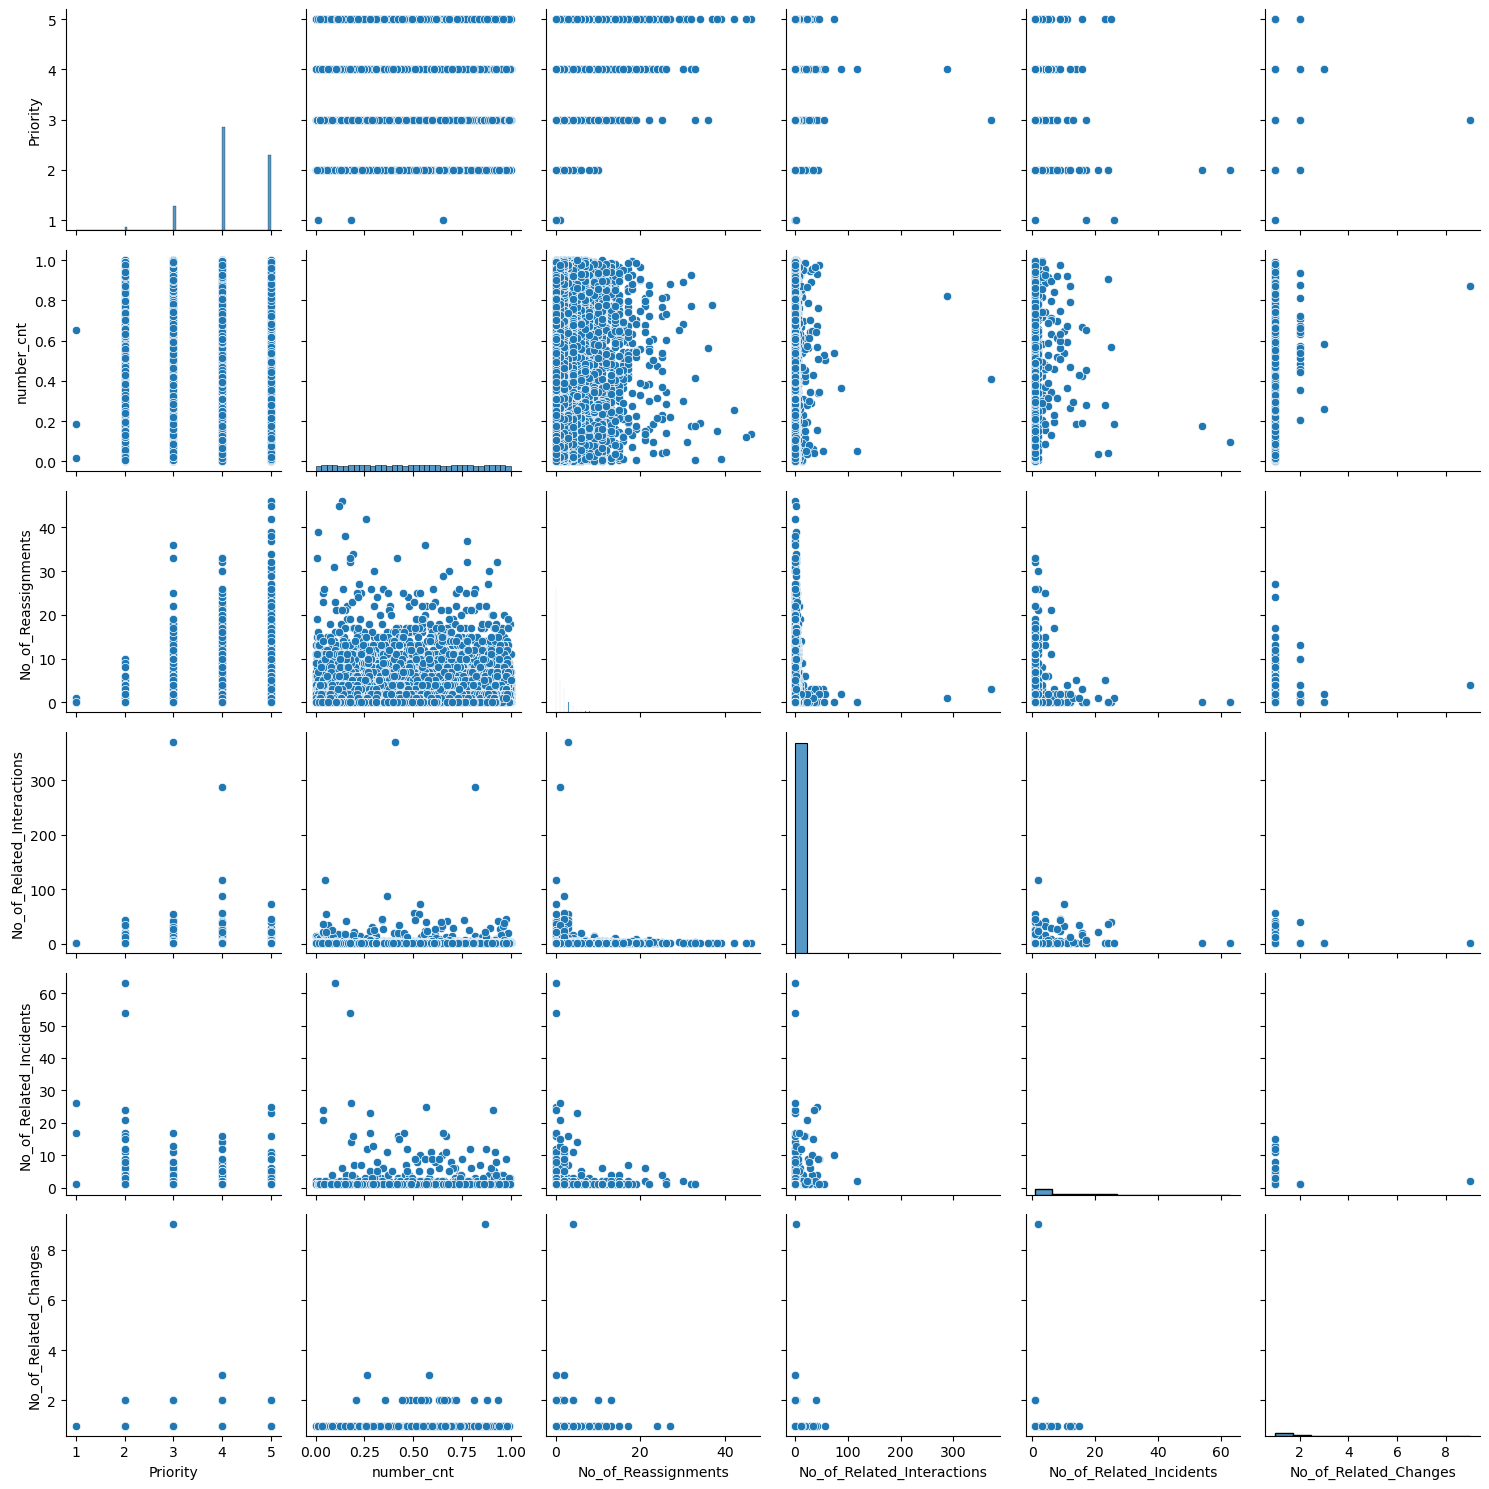

In [ ]:
plt.figure(figsize=(40,45))
sns.pairplot(data)
plt.tight_layout()

In [ ]:
# It shows all ploting of ecah feature with other features.

Text(0.5, 1.0, 'Correlation Heatmap')

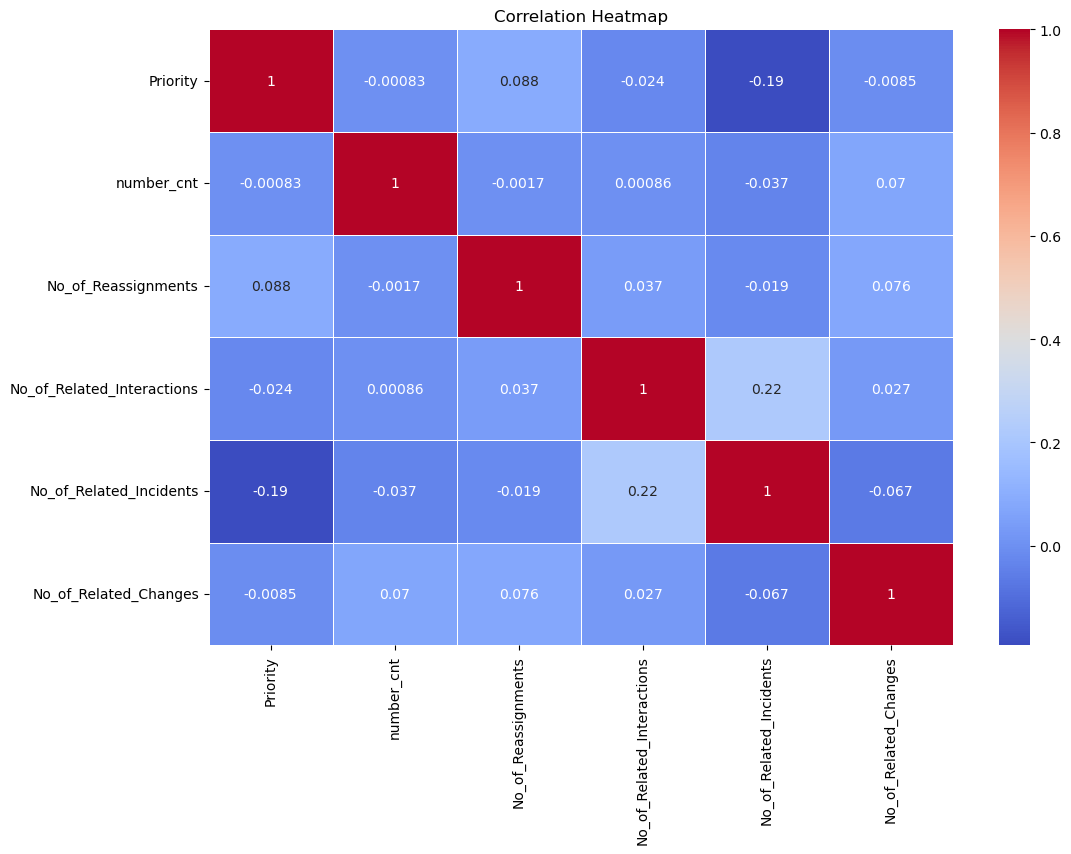

In [ ]:
# Select only the numeric columns for correlation analysis:
numeric_data = data.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
correlation = numeric_data.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Insight:
* As there is no feature highly corelated with dependent feature(Priority).So we dont't drop any feature.
* These are very less correlation with prority.

## Check for Outliers:

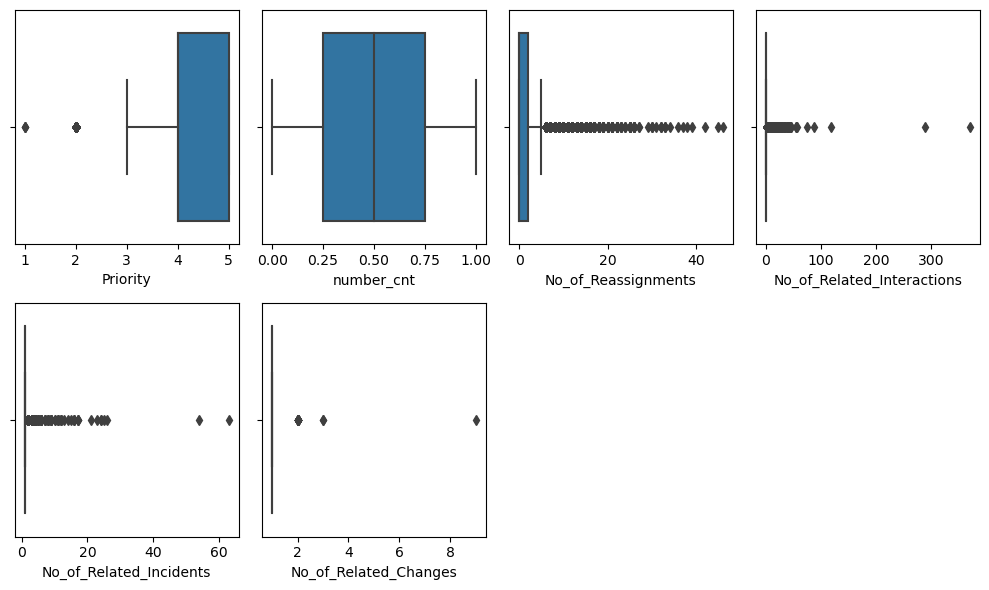

In [ ]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in numeric_data:
    if plotnumber<8:
        ax=plt.subplot(2,4,plotnumber)
        sns.boxplot(x=data[col])
        plt.xlabel(col,fontsize=10)
        plotnumber+=1
plt.tight_layout()

###  Box Plot for No_of_Reassignments:

Text(0, 0.5, 'No_of_Reassignments')

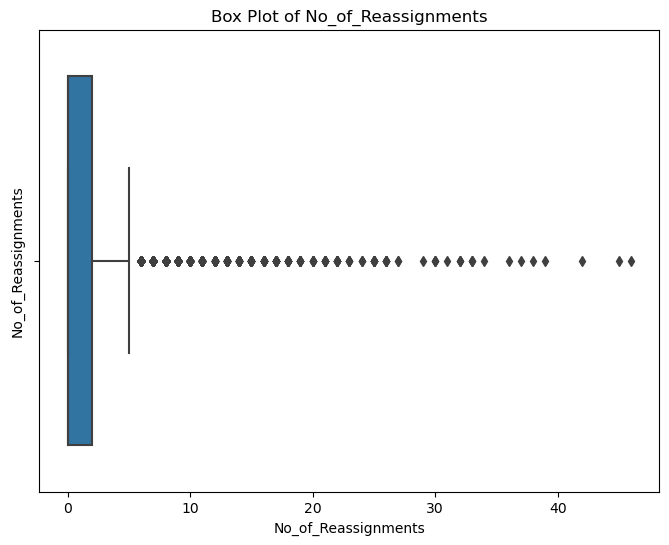

In [ ]:
# Create a box plot for the 'number_cnt' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['No_of_Reassignments'])
plt.title('Box Plot of No_of_Reassignments')
plt.ylabel('No_of_Reassignments')


### Outliers Handle for No_of_Reassignments:

<Axes: xlabel='No_of_Reassignments', ylabel='Count'>

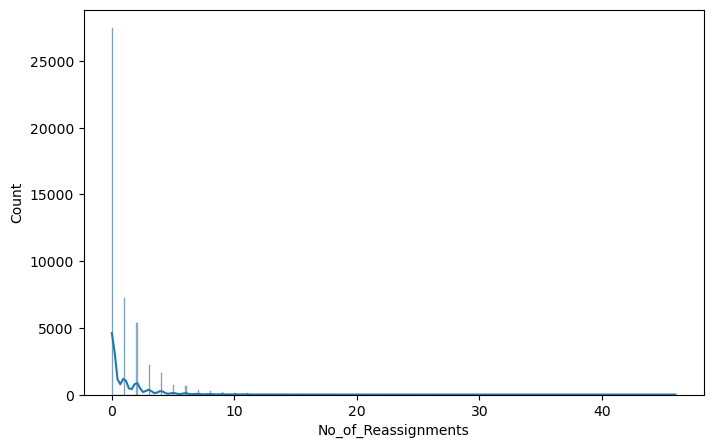

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Reassignments',kde=True)

###### Insights:
* Most tickets (0 reassignments) are resolved without being reassigned.

* Reassignments decrease exponentially.

* There is a small peak at 3 reassignments.

* The graph is skewed to the right, meaning more tickets have a few reassignments than many reassignments.

In [ ]:
Q1=data["No_of_Reassignments"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Reassignments"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 0.0
upper_quartile 2.0


In [ ]:
IQR=Q3-Q1
IQR

2.0

In [ ]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is -3.0
upper_limit is 5.0


In [ ]:
data.loc[data["No_of_Reassignments"]>upper_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,subapplication,Web Based Application,Closed,4,4,4.0,0.601292,incident,26.0,2012-05-02 13:32:00,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,2.0,NaN
1,application,Web Based Application,Closed,3,3,3.0,0.415050,incident,33.0,2012-12-03 15:44:00,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,NaT,Software,1.0,1.0,NaN
3,application,Web Based Application,Closed,4,4,4.0,0.642927,incident,13.0,NaT,NaT,NaT,NaT,NaT,Operator error,1.0,NaN,NaN
10,application,Web Based Application,Closed,4,4,4.0,0.439909,incident,6.0,NaT,NaT,2013-08-11 14:23:00,2013-08-11 14:23:00,NaT,Software,1.0,NaN,1.0
11,application,Web Based Application,Closed,4,4,4.0,0.291928,incident,8.0,2012-01-10 10:49:00,NaT,2013-08-11 14:18:00,2013-08-11 14:22:00,NaT,Software,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44961,application,Server Based Application,Closed,3,3,3.0,0.267787,incident,10.0,NaT,NaT,NaT,NaT,NaT,Other,2.0,NaN,NaN
45040,application,Server Based Application,Closed,5,5,5.0,0.680022,incident,6.0,NaT,NaT,NaT,NaT,NaT,Software,1.0,NaN,NaN
45196,application,Server Based Application,Closed,4,4,4.0,0.449103,incident,7.0,NaT,NaT,NaT,NaT,NaT,Other,1.0,NaN,NaN
45273,application,Desktop Application,Closed,4,4,4.0,0.166302,incident,8.0,NaT,NaT,NaT,NaT,NaT,Software,1.0,NaN,NaN


In [ ]:
len(data.loc[data["No_of_Reassignments"]>upper_limit])/len(data)

0.04233360511522122

In [ ]:
data.loc[data["No_of_Reassignments"]>upper_limit,"No_of_Reassignments"]=data["No_of_Reassignments"].median()

<Axes: xlabel='No_of_Reassignments'>

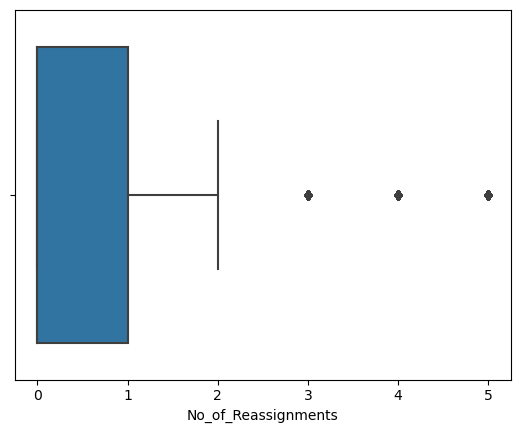

In [ ]:
sns.boxplot(x=data.No_of_Reassignments)

## Box Plot for No_of_Related_Interactions:


Text(0, 0.5, 'No_of_Related_Interactions')

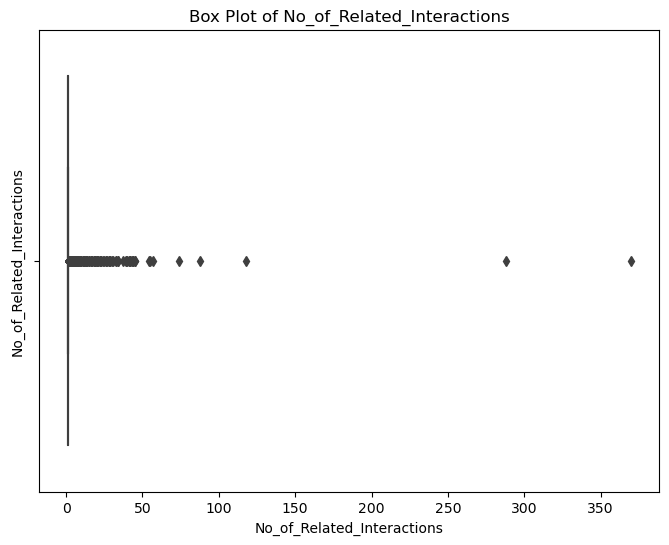

In [ ]:
# Create a box plot for the 'No_of_Related_Interactions' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['No_of_Related_Interactions'])
plt.title('Box Plot of No_of_Related_Interactions')
plt.ylabel('No_of_Related_Interactions')

## Outliers Handle for No_of_Related_Interactions:


<Axes: xlabel='No_of_Related_Interactions', ylabel='Count'>

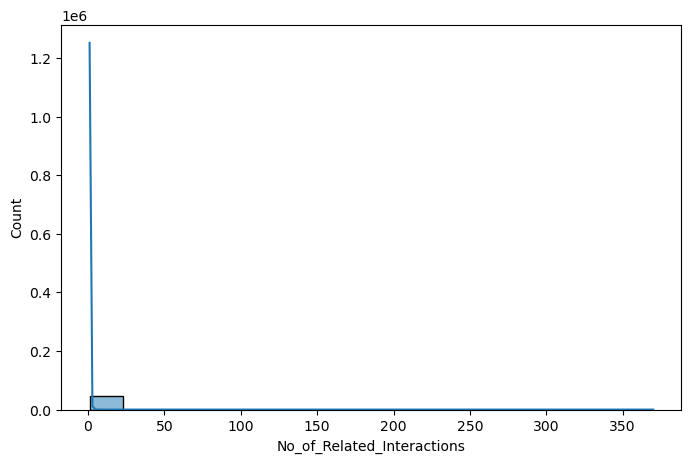

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Related_Interactions',kde=True)

#### Insight: Most tickets(0 interaction) are resolved without interaction.


In [ ]:
Q1 = data["No_of_Related_Interactions"].quantile(0.25)
print("lower_quantile",Q1)
Q3 = data["No_of_Related_Interactions"].quantile(0.75)
print("upper_quantile",Q3)


lower_quantile 1.0
upper_quantile 1.0


In [ ]:
IQR=Q3 - Q1
IQR

0.0

In [ ]:
lower_limit = Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit = Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 1.0


In [ ]:
data.loc[data["No_of_Related_Interactions"]>upper_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
12,application,Web Based Application,Closed,4,4,4.0,0.776486,incident,5.0,2012-02-10 12:12:00,NaT,2014-04-02 09:38:00,2014-04-02 09:38:00,NaT,Software,2.0,NaN,NaN
18,application,Desktop Application,Closed,3,3,3.0,0.860255,incident,0.0,2012-07-12 14:34:00,NaT,NaT,NaT,NaT,Other,2.0,NaN,NaN
19,application,Web Based Application,Closed,5,5,5.0,0.663615,incident,5.0,2012-10-12 14:44:00,2014-11-02 14:50:00,NaT,NaT,NaT,Other,2.0,NaN,NaN
27,application,Server Based Application,Closed,5,5,5.0,0.748361,request for information,0.0,2013-06-02 14:07:00,NaT,NaT,NaT,NaT,No error - works as designed,2.0,NaN,NaN
29,application,Server Based Application,Closed,5,5,5.0,0.853722,request for information,2.0,NaT,2013-04-12 13:58:00,NaT,2013-04-12 14:00:00,NaT,Other,2.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46455,application,Server Based Application,Closed,4,4,4.0,0.175887,incident,1.0,NaT,NaT,NaT,NaT,NaT,Other,2.0,NaN,NaN
46458,application,Server Based Application,Closed,5,5,5.0,0.969598,incident,0.0,NaT,NaT,NaT,NaT,NaT,Software,2.0,NaN,NaN
46460,application,Server Based Application,Closed,5,3,4.0,0.628989,incident,0.0,NaT,NaT,NaT,NaT,NaT,Software,2.0,NaN,NaN
46471,application,Server Based Application,Closed,5,5,5.0,0.280788,incident,0.0,NaT,NaT,NaT,NaT,NaT,Software,2.0,NaN,NaN


In [ ]:
data.loc[data["No_of_Related_Interactions"]<lower_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes


In [ ]:
len(data.loc[data["No_of_Related_Interactions"]>upper_limit])/len(data)

0.07368150023602112

In [ ]:
data.loc[data["No_of_Related_Interactions"]>upper_limit,"No_of_Related_Interactions"]=data["No_of_Related_Interactions"].median()

<Axes: xlabel='No_of_Related_Interactions'>

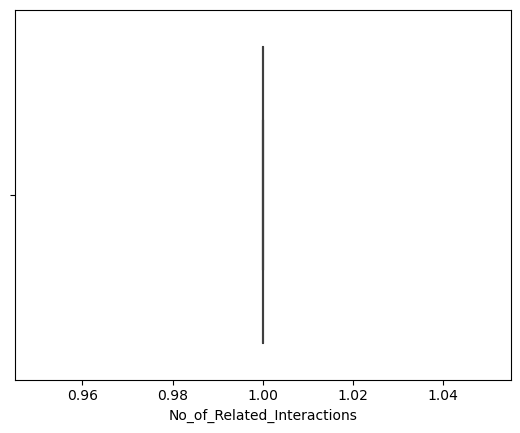

In [ ]:
sns.boxplot(x=data.No_of_Related_Interactions)


##### Insights:
* Median number of related interactions is 1.

* 75% of tickets have 3 or fewer related interactions.

* There are a few outliers with many related interactions (up to 20).
    

## Box Plot for No_of_Related_Incidents

Text(0, 0.5, 'No_of_Related_Incidents')

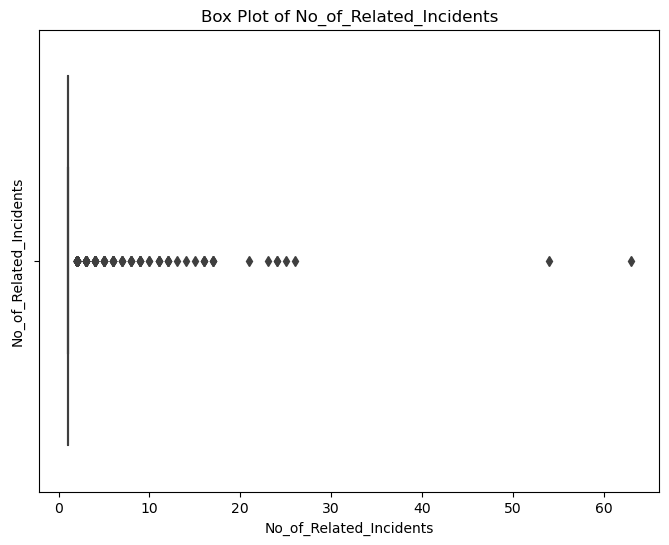

In [ ]:
# Create a box plot for the 'No_of_Related_Incidents' column
plt.figure(figsize=(8,6))
sns.boxplot(x=data['No_of_Related_Incidents'])
plt.title('Box Plot of No_of_Related_Incidents')
plt.ylabel('No_of_Related_Incidents')

## Outliers Handle for No_of_Related_Incidents

<Axes: xlabel='No_of_Related_Incidents', ylabel='Count'>

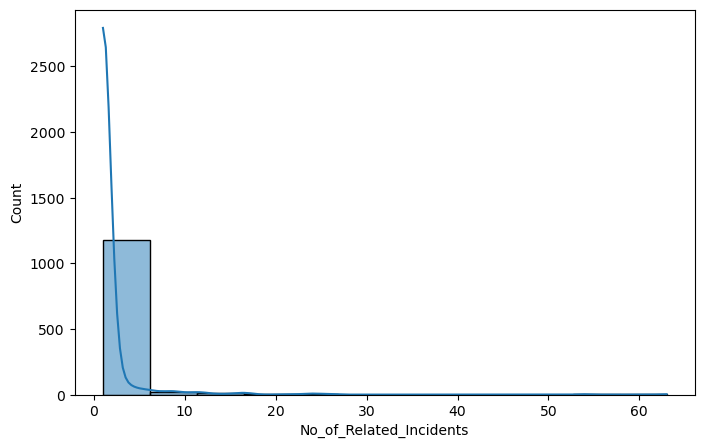

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Related_Incidents',kde=True)

### Insights
* The most common number of related incidents is 1.

* The distribution of the number of related incidents is skewed to the right, meaning that there are more incidents with fewer      related incidents than incidents with more related incidents.

* The maximum number of related incidents is 63.

In [ ]:
Q1=data["No_of_Related_Incidents"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Related_Incidents"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 1.0
upper_quartile 1.0


In [ ]:
IQR=Q3-Q1
IQR

0.0

In [ ]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 1.0


In [ ]:
data.loc[data["No_of_Related_Incidents"]>upper_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,subapplication,Web Based Application,Closed,4,4,4.0,0.601292,incident,0.0,2012-05-02 13:32:00,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,2.0,NaN
13,application,Web Based Application,Closed,4,4,4.0,0.592713,incident,0.0,NaT,NaT,NaT,NaT,NaT,Software,1.0,2.0,NaN
15,application,Web Based Application,Closed,4,4,4.0,0.701705,incident,3.0,NaT,NaT,2013-08-11 14:57:00,2013-08-11 14:58:00,NaT,Other,1.0,2.0,NaN
20,application,Web Based Application,Closed,4,4,4.0,0.428148,incident,0.0,NaT,NaT,NaT,NaT,NaT,Referred,1.0,2.0,NaN
119,application,Standard Application,Closed,5,5,5.0,0.875886,incident,2.0,NaT,NaT,NaT,NaT,NaT,Software,1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45336,application,Server Based Application,Closed,3,3,3.0,0.496306,incident,0.0,NaT,NaT,NaT,NaT,NaT,Hardware,1.0,2.0,NaN
45411,application,Desktop Application,Closed,2,3,2.0,0.427608,incident,1.0,NaT,NaT,NaT,NaT,NaT,Software,1.0,15.0,1.0
45962,subapplication,Web Based Application,Closed,2,2,2.0,0.922142,incident,0.0,NaT,NaT,NaT,NaT,NaT,Other,1.0,8.0,NaN
46263,subapplication,Web Based Application,Closed,5,5,5.0,0.572573,incident,2.0,NaT,NaT,NaT,NaT,NaT,Other,1.0,2.0,NaN


In [ ]:
len(data.loc[data["No_of_Related_Incidents"]>upper_limit])/len(data)

0.003540316697420933

In [ ]:
data.loc[data["No_of_Related_Incidents"]>upper_limit,"No_of_Related_Incidents"]=data["No_of_Related_Incidents"].median()

<Axes: xlabel='No_of_Related_Incidents'>

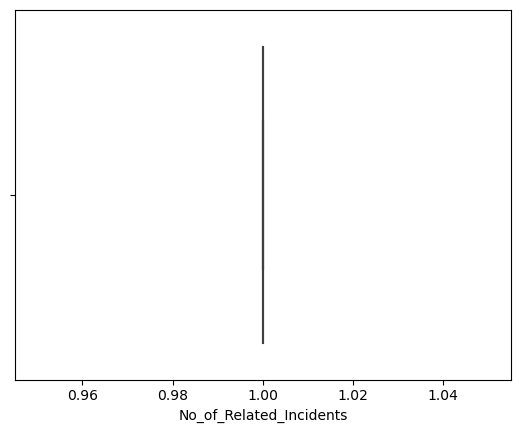

In [ ]:
sns.boxplot(x=data.No_of_Related_Incidents)

## Box Plot for No_of_Related_Changes

Text(0, 0.5, 'No_of_Related_Changes')

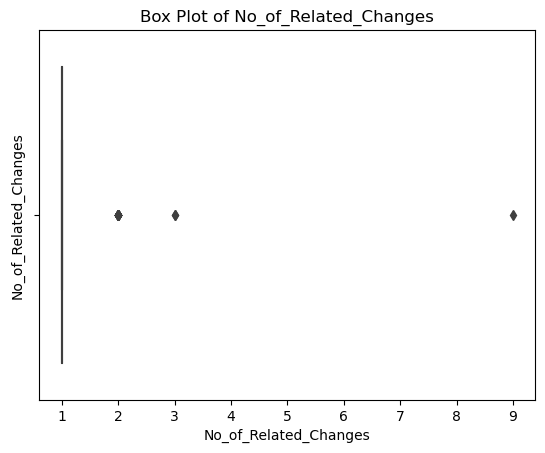

In [ ]:
# Create a box plot for the 'No_of_Related_Changes' column
sns.boxplot(x=data['No_of_Related_Changes'])
plt.title('Box Plot of No_of_Related_Changes')
plt.ylabel('No_of_Related_Changes')

## Outliers Handle for No_of_Related_changes

<Axes: xlabel='No_of_Related_Changes', ylabel='Count'>

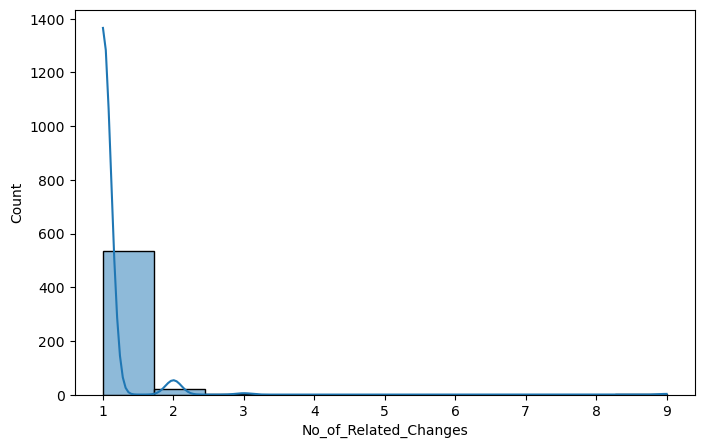

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(data=data,x='No_of_Related_Changes',kde=True)

### Insights
* The most common number of related changes is 1.

* The distribution of the number of related changes is skewed to the right, meaning that there are more changes with fewer related changes than changes with more related changes.





In [ ]:
Q1=data["No_of_Related_Changes"].quantile(0.25)
print("lower_quartile",Q1)
Q3=data["No_of_Related_Changes"].quantile(0.75)
print("upper_quartile",Q3)

lower_quartile 1.0
upper_quartile 1.0


In [ ]:
IQR=Q3-Q1
IQR


0.0

In [ ]:
lower_limit=Q1-1.5*IQR
print("lower_limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper_limit is",upper_limit)

lower_limit is 1.0
upper_limit is 1.0


In [ ]:
data.loc[data["No_of_Related_Changes"]>upper_limit]

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
38,application,Web Based Application,Closed,3,3,3.0,0.481873,incident,4.0,2013-05-03 13:58:00,NaT,2013-08-11 15:35:00,2013-08-11 15:35:00,NaT,Software,1.0,NaN,2.0
134,application,Standard Application,Closed,4,4,4.0,0.877301,incident,2.0,2013-05-07 13:35:00,NaT,NaT,NaT,NaT,Operator error,1.0,1.0,2.0
360,application,Web Based Application,Closed,4,4,4.0,0.261065,incident,0.0,2013-10-09 13:09:00,NaT,2013-05-12 10:16:00,2013-05-12 10:17:00,NaT,Unknown,1.0,NaN,3.0
403,subapplication,Web Based Application,Closed,NS,3,NaN,0.709596,incident,0.0,2013-12-09 11:14:00,NaT,NaT,NaT,NaT,Other,1.0,1.0,2.0
578,application,Desktop Application,Closed,4,4,4.0,0.354227,incident,2.0,NaT,NaT,2013-11-10 12:41:00,2013-11-10 13:24:00,NaT,Other,1.0,NaN,2.0
699,application,Web Based Application,Closed,5,5,5.0,0.574457,request for information,0.0,NaT,NaT,NaT,NaT,NaT,Other,1.0,NaN,2.0
3031,application,Server Based Application,Closed,5,5,5.0,0.673485,incident,0.0,2013-07-10 10:57:00,2013-11-10 10:32:00,NaT,NaT,NaT,Software,1.0,NaN,2.0
4912,application,Web Based Application,Closed,5,5,5.0,0.631183,incident,0.0,NaT,NaT,2013-04-11 08:44:00,2013-04-11 08:44:00,NaT,Software,1.0,NaN,2.0
8907,application,Web Based Application,Closed,4,4,4.0,0.456999,incident,0.0,NaT,NaT,2013-05-11 13:25:00,2013-05-11 13:26:00,NaT,Software,1.0,NaN,2.0
19350,application,Server Based Application,Closed,4,4,4.0,0.205976,incident,2.0,2013-06-12 10:41:00,NaT,2013-06-12 14:05:00,2013-06-12 14:05:00,NaT,Other,1.0,NaN,2.0


In [ ]:
len(data.loc[data["No_of_Related_Changes"]>upper_limit])/len(data)

0.0005149551559884993

In [ ]:
data.loc[data["No_of_Related_Changes"]>upper_limit,"No_of_Related_Changes"]=data["No_of_Related_Changes"].median()

<Axes: xlabel='No_of_Related_Changes'>

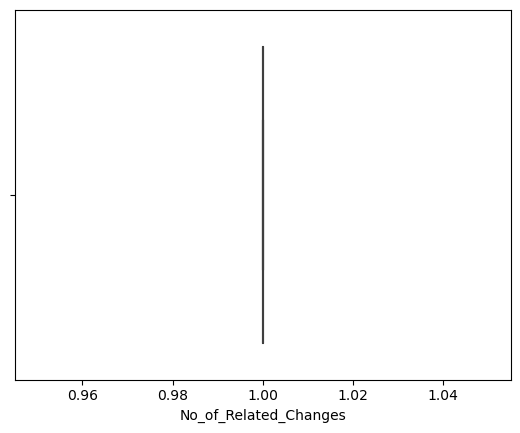

In [ ]:
sns.boxplot(x=data.No_of_Related_Changes)

# Feature Engineering

## Data preprocessing column by column:

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Cat                      46606 non-null  object        
 1   CI_Subcat                   46606 non-null  object        
 2   Status                      46606 non-null  object        
 3   Impact                      46606 non-null  object        
 4   Urgency                     46606 non-null  object        
 5   Priority                    45226 non-null  float64       
 6   number_cnt                  46606 non-null  float64       
 7   Category                    46606 non-null  object        
 8   No_of_Reassignments         46605 non-null  float64       
 9   Open_Time                   18612 non-null  datetime64[ns]
 10  Reopen_Time                 871 non-null    datetime64[ns]
 11  Resolved_Time               17577 non-null  datetime64

## data['CI_Cat']

In [ ]:
data.CI_Cat.unique()
data.CI_Cat.value_counts()

CI_Cat
application             32900
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
                          111
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64

In [ ]:
print("Null - ",data["CI_Cat"].isnull().sum()) # printing the sum of null values present for particular feature.
print("Empty names - ",(data["CI_Cat"] == '').sum()) # printing the sum  of empty names  present for particular feature.

Null -  0
Empty names -  111


In [ ]:
data['CI_Cat'].mode() # It gives the mode of particular feature.

0    application
Name: CI_Cat, dtype: object

In [ ]:
# There were 111 empty values present in this column replacing those with mode i.e. application
data.loc[data["CI_Cat"] == '',"CI_Cat"] = 'application'

In [ ]:
data['CI_Cat'].value_counts() # It shows count of unique values

CI_Cat
application             33011
subapplication           7782
computer                 3643
storage                   703
hardware                  442
software                  333
database                  214
displaydevice             212
officeelectronics         152
networkcomponents         107
applicationcomponent        5
Phone                       2
Name: count, dtype: int64

In [ ]:
# Transforming the column from categorical column to numerical column using label_encoder

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
data['CI_Cat']=encoder.fit_transform(data['CI_Cat'])

In [ ]:
data['CI_Cat'].value_counts()

CI_Cat
1     33011
11     7782
3      3643
10      703
6       442
9       333
4       214
5       212
8       152
7       107
2         5
0         2
Name: count, dtype: int64

In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,11,Web Based Application,Closed,4,4,4.0,0.601292,incident,0.0,2012-05-02 13:32:00,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,1.0,NaN
1,1,Web Based Application,Closed,3,3,3.0,0.415050,incident,0.0,2012-12-03 15:44:00,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,NaT,Software,1.0,1.0,NaN
2,1,Desktop Application,Closed,NS,3,NaN,0.517551,request for information,3.0,NaT,NaT,NaT,NaT,NaT,No error - works as designed,1.0,NaN,NaN
3,1,Web Based Application,Closed,4,4,4.0,0.642927,incident,0.0,NaT,NaT,NaT,NaT,NaT,Operator error,1.0,NaN,NaN
4,1,Web Based Application,Closed,4,4,4.0,0.345258,incident,2.0,2012-10-08 11:01:00,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,NaT,Other,1.0,NaN,NaN


## data['CI_Subcat']

In [ ]:
data['CI_Subcat'].unique()

array(['Web Based Application', 'Desktop Application',
       'Server Based Application', 'SAP', 'Client Based Application',
       'Citrix', 'Standard Application', 'Windows Server', 'Laptop',
       'Linux Server', '', 'Monitor', 'Automation Software', 'SAN',
       'Banking Device', 'Desktop', 'Database', 'Oracle Server',
       'Keyboard', 'Printer', 'Exchange', 'System Software', 'VDI',
       'Encryption', 'Omgeving', 'MigratieDummy', 'Scanner', 'Controller',
       'DataCenterEquipment', 'KVM Switches', 'Switch',
       'Database Software', 'Network Component', 'Unix Server', 'Lines',
       'ESX Cluster', 'zOS Server', 'SharePoint Farm', 'NonStop Server',
       'Application Server', 'Security Software', 'Thin Client',
       'zOS Cluster', 'Router', 'VMWare', 'Net Device', 'Neoview Server',
       'MQ Queue Manager', 'UPS', 'Number', 'Iptelephony',
       'Windows Server in extern beheer', 'Modem', 'X86 Server',
       'ESX Server', 'Virtual Tape Server', 'IPtelephony',
      

In [ ]:
data['CI_Subcat'].value_counts()

CI_Subcat
Server Based Application    18811
Web Based Application       15311
Desktop Application          3876
Laptop                       1921
SAP                          1199
                            ...  
Security Software               1
Application Server              1
NonStop Storage                 1
Protocol                        1
Neoview Server                  1
Name: count, Length: 65, dtype: int64

In [ ]:
print("Null - ",data["CI_Subcat"].isnull().sum())
print("Empty names - ",(data["CI_Subcat"]=='').sum())

Null -  0
Empty names -  111


In [ ]:
data['CI_Subcat'].mode()

0    Server Based Application
Name: CI_Subcat, dtype: object

In [ ]:
#There were 111 empty values present this columns replacing those with mode i.e. server based application
data.loc[data["CI_Subcat"]=='',"CI_Subcat"] = data['CI_Subcat'].mode()[0]

In [ ]:
print("Null - ",data["CI_Subcat"].isnull().sum())
print("Empty names - ",(data["CI_Subcat"]=='').sum())

Null -  0
Empty names -  0


In [ ]:
# using lable_encoder to transform categorical to numerical columns
data['CI_Subcat']=encoder.fit_transform(data['CI_Subcat'])

In [ ]:
data.CI_Subcat.unique()
data.CI_Subcat.value_counts()

CI_Subcat
45    18922
57    15311
10     3876
21     1921
42     1199
      ...  
55        1
0         1
33        1
38        1
44        1
Name: count, Length: 64, dtype: int64

In [ ]:
data.head(5)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,11,57,Closed,4,4,4.0,0.601292,incident,0.0,2012-05-02 13:32:00,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,1.0,NaN
1,1,57,Closed,3,3,3.0,0.415050,incident,0.0,2012-12-03 15:44:00,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,NaT,Software,1.0,1.0,NaN
2,1,10,Closed,NS,3,NaN,0.517551,request for information,3.0,NaT,NaT,NaT,NaT,NaT,No error - works as designed,1.0,NaN,NaN
3,1,57,Closed,4,4,4.0,0.642927,incident,0.0,NaT,NaT,NaT,NaT,NaT,Operator error,1.0,NaN,NaN
4,1,57,Closed,4,4,4.0,0.345258,incident,2.0,2012-10-08 11:01:00,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,NaT,Other,1.0,NaN,NaN


## data['Status']

In [ ]:
data.Status.unique()
data.Status.value_counts()

Status
Closed              46597
Work in progress        9
Name: count, dtype: int64

In [ ]:
print("Null - ",data["Status"].isnull().sum())
print("Empty names - ",(data["Status"]=='').sum())

Null -  0
Empty names -  0


In [ ]:
# Using label encoder to convert the categorical columns to numerical columns
data['Status']=encoder.fit_transform(data['Status'])

In [ ]:
data['Status'].unique()

array([0, 1])

In [ ]:
data.head(5)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,11,57,0,4,4,4.0,0.601292,incident,0.0,2012-05-02 13:32:00,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,1.0,NaN
1,1,57,0,3,3,3.0,0.415050,incident,0.0,2012-12-03 15:44:00,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,NaT,Software,1.0,1.0,NaN
2,1,10,0,NS,3,NaN,0.517551,request for information,3.0,NaT,NaT,NaT,NaT,NaT,No error - works as designed,1.0,NaN,NaN
3,1,57,0,4,4,4.0,0.642927,incident,0.0,NaT,NaT,NaT,NaT,NaT,Operator error,1.0,NaN,NaN
4,1,57,0,4,4,4.0,0.345258,incident,2.0,2012-10-08 11:01:00,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,NaT,Other,1.0,NaN,NaN


## data['Impact']

In [ ]:
data.Impact.unique()
data.Impact.value_counts()

Impact
4     22556
5     16741
3      5234
NS     1380
2       692
1         3
Name: count, dtype: int64

In [ ]:
data['Impact'].mode()

0    4
Name: Impact, dtype: object

In [ ]:
print("Null - ",data["Impact"].isnull().sum())
print("Empty names - ",(data["Impact"]=='').sum())

Null -  0
Empty names -  0


In [ ]:
data.loc[data['Impact']=='NS','Impact']=data['Impact'].mode()[0]

In [ ]:
data.Impact.unique()
data.Impact.value_counts()

Impact
4    23936
5    16741
3     5234
2      692
1        3
Name: count, dtype: int64

In [ ]:
data['Impact']=data['Impact'].astype(int)

In [ ]:
data.head(5)

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,11,57,0,4,4,4.0,0.601292,incident,0.0,2012-05-02 13:32:00,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,1.0,NaN
1,1,57,0,3,3,3.0,0.415050,incident,0.0,2012-12-03 15:44:00,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,NaT,Software,1.0,1.0,NaN
2,1,10,0,4,3,NaN,0.517551,request for information,3.0,NaT,NaT,NaT,NaT,NaT,No error - works as designed,1.0,NaN,NaN
3,1,57,0,4,4,4.0,0.642927,incident,0.0,NaT,NaT,NaT,NaT,NaT,Operator error,1.0,NaN,NaN
4,1,57,0,4,4,4.0,0.345258,incident,2.0,2012-10-08 11:01:00,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,NaT,Other,1.0,NaN,NaN


## data['Urgency']

In [ ]:
data.Urgency.unique()
data.Urgency.value_counts()


Urgency
4               22588
5               16779
3                6536
2                 696
1                   6
5 - Very Low        1
Name: count, dtype: int64

In [ ]:
# As only 1 entry there in the 5-very low,  dropping that .
data.drop(data.loc[data['Urgency']=='5 - Very Low'].index,axis=0,inplace=True)

In [ ]:
data['Urgency'].value_counts()

Urgency
4    22588
5    16779
3     6536
2      696
1        6
Name: count, dtype: int64

In [ ]:
print("Null - ",data["Urgency"].isnull().sum())
print("Empty names - ",(data["Urgency"]=='').sum())

Null -  0
Empty names -  0


In [ ]:
data['Urgency']=data['Urgency'].astype(int)

In [ ]:
data.Urgency.unique()


array([4, 3, 5, 2, 1])

In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,11,57,0,4,4,4.0,0.601292,incident,0.0,2012-05-02 13:32:00,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,1.0,NaN
1,1,57,0,3,3,3.0,0.415050,incident,0.0,2012-12-03 15:44:00,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,NaT,Software,1.0,1.0,NaN
2,1,10,0,4,3,NaN,0.517551,request for information,3.0,NaT,NaT,NaT,NaT,NaT,No error - works as designed,1.0,NaN,NaN
3,1,57,0,4,4,4.0,0.642927,incident,0.0,NaT,NaT,NaT,NaT,NaT,Operator error,1.0,NaN,NaN
4,1,57,0,4,4,4.0,0.345258,incident,2.0,2012-10-08 11:01:00,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,NaT,Other,1.0,NaN,NaN


## data['Priority']

In [ ]:
data['Priority'].unique()


array([ 4.,  3., nan,  5.,  2.,  1.])

In [ ]:
data['Priority'].value_counts()

Priority
4.0    22717
5.0    16485
3.0     5323
2.0      697
1.0        3
Name: count, dtype: int64

In [ ]:
print("Null - ",data["Priority"].isnull().sum())
print("Empty names - ",(data["Priority"] == '').sum())

Null -  1380
Empty names -  0


In [ ]:
# Replacing the null values with mode
data['Priority'].mode()

0    4.0
Name: Priority, dtype: float64

In [ ]:
data.loc[data['Priority'].isnull(),'Priority']=data['Priority'].mode()[0]

In [ ]:
print("Null - ",data["Priority"].isnull().sum())
print("Empty names - ",(data["Priority"] == '').sum())

Null -  0
Empty names -  0


In [ ]:
data['Priority'].value_counts()

Priority
4.0    24097
5.0    16485
3.0     5323
2.0      697
1.0        3
Name: count, dtype: int64

In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,11,57,0,4,4,4.0,0.601292,incident,0.0,2012-05-02 13:32:00,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,1.0,NaN
1,1,57,0,3,3,3.0,0.415050,incident,0.0,2012-12-03 15:44:00,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,NaT,Software,1.0,1.0,NaN
2,1,10,0,4,3,4.0,0.517551,request for information,3.0,NaT,NaT,NaT,NaT,NaT,No error - works as designed,1.0,NaN,NaN
3,1,57,0,4,4,4.0,0.642927,incident,0.0,NaT,NaT,NaT,NaT,NaT,Operator error,1.0,NaN,NaN
4,1,57,0,4,4,4.0,0.345258,incident,2.0,2012-10-08 11:01:00,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,NaT,Other,1.0,NaN,NaN


## data['number_cnt']

In [ ]:
print("Null - ",data["number_cnt"].isna().sum())
print("Empty names - ",(data["number_cnt"]=='').sum())

Null -  0
Empty names -  0


In [ ]:
data['number_cnt']=data['number_cnt'].astype(float)

In [ ]:
data['number_cnt'].dtypes

dtype('float64')

## data['Category']

In [ ]:
data.Category.unique()
data.Category.value_counts()

Category
incident                   37748
request for information     8845
complaint                     11
request for change             1
Name: count, dtype: int64

In [ ]:
# Transforming the catergorical columns to numerical columns
data['Category']=encoder.fit_transform(data['Category'])

In [ ]:
data['Category'].value_counts()

Category
1    37748
3     8845
0       11
2        1
Name: count, dtype: int64

In [ ]:
print("Null - ",data["Category"].isna().sum())
print("Empty names - ",(data["Category"]=='').sum())

Null -  0
Empty names -  0


In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,11,57,0,4,4,4.0,0.601292,1,0.0,2012-05-02 13:32:00,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,1.0,NaN
1,1,57,0,3,3,3.0,0.415050,1,0.0,2012-12-03 15:44:00,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,NaT,Software,1.0,1.0,NaN
2,1,10,0,4,3,4.0,0.517551,3,3.0,NaT,NaT,NaT,NaT,NaT,No error - works as designed,1.0,NaN,NaN
3,1,57,0,4,4,4.0,0.642927,1,0.0,NaT,NaT,NaT,NaT,NaT,Operator error,1.0,NaN,NaN
4,1,57,0,4,4,4.0,0.345258,1,2.0,2012-10-08 11:01:00,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,NaT,Other,1.0,NaN,NaN


## data['No_of_Reassignments']

In [ ]:
data['No_of_Reassignments'].unique()

array([ 0.,  3.,  2.,  4.,  5.,  1., nan])

In [ ]:
data['No_of_Reassignments'].value_counts()

No_of_Reassignments
0.0    29440
1.0     7268
2.0     5378
3.0     2191
4.0     1606
5.0      721
Name: count, dtype: int64

In [ ]:
print("Null - ",data["No_of_Reassignments"].isnull().sum())
print("Empty names - ",(data["No_of_Reassignments"]=='').sum())

Null -  1
Empty names -  0


In [ ]:
data['No_of_Reassignments'].mode()

0    0.0
Name: No_of_Reassignments, dtype: float64

In [ ]:
# Replacing null value with mode i.e 0
data.loc[data['No_of_Reassignments'].isnull(),'No_of_Reassignments']=data['No_of_Reassignments'].mode()[0]

In [ ]:
print("Null - ",data["No_of_Reassignments"].isnull().sum())
print("Empty names - ",(data["No_of_Reassignments"]=='').sum())

Null -  0
Empty names -  0


In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,11,57,0,4,4,4.0,0.601292,1,0.0,2012-05-02 13:32:00,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,1.0,NaN
1,1,57,0,3,3,3.0,0.415050,1,0.0,2012-12-03 15:44:00,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,NaT,Software,1.0,1.0,NaN
2,1,10,0,4,3,4.0,0.517551,3,3.0,NaT,NaT,NaT,NaT,NaT,No error - works as designed,1.0,NaN,NaN
3,1,57,0,4,4,4.0,0.642927,1,0.0,NaT,NaT,NaT,NaT,NaT,Operator error,1.0,NaN,NaN
4,1,57,0,4,4,4.0,0.345258,1,2.0,2012-10-08 11:01:00,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,NaT,Other,1.0,NaN,NaN


## data['Open_Time']

In [ ]:
print("Null - ",data["Open_Time"].isnull().sum())
print("Empty names - ",(data["Open_Time"]=='').sum())

Null -  27993
Empty names -  0


In [ ]:
data['Open_Time'].mode()

0   2013-12-11 11:04:00
1   2014-07-02 10:44:00
Name: Open_Time, dtype: datetime64[ns]

In [ ]:
data.loc[data['Open_Time'].isnull(),'Open_Time']=data['Open_Time'].mode()[0]

In [ ]:
print("Null - ",data["Open_Time"].isnull().sum())
print("Empty names - ",(data["Open_Time"]=='').sum())

Null -  0
Empty names -  0


In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,11,57,0,4,4,4.0,0.601292,1,0.0,2012-05-02 13:32:00,NaT,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,1.0,NaN
1,1,57,0,3,3,3.0,0.415050,1,0.0,2012-12-03 15:44:00,2013-02-12 12:31:00,2013-02-12 12:36:00,2013-02-12 12:36:00,NaT,Software,1.0,1.0,NaN
2,1,10,0,4,3,4.0,0.517551,3,3.0,2013-12-11 11:04:00,NaT,NaT,NaT,NaT,No error - works as designed,1.0,NaN,NaN
3,1,57,0,4,4,4.0,0.642927,1,0.0,2013-12-11 11:04:00,NaT,NaT,NaT,NaT,Operator error,1.0,NaN,NaN
4,1,57,0,4,4,4.0,0.345258,1,2.0,2012-10-08 11:01:00,NaT,2013-08-11 13:55:00,2013-08-11 13:55:00,NaT,Other,1.0,NaN,NaN


## data['Reopen_Time']

In [ ]:
print("Null - ",data["Reopen_Time"].isnull().sum())
print("Empty names - ",(data["Reopen_Time"]=='').sum())

Null -  45734
Empty names -  0


In [ ]:
# As the column contains more than 50% of null values,so we drop the column
data.drop("Reopen_Time",axis=1,inplace=True)

In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,11,57,0,4,4,4.0,0.601292,1,0.0,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,1.0,NaN
1,1,57,0,3,3,3.0,0.415050,1,0.0,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,NaT,Software,1.0,1.0,NaN
2,1,10,0,4,3,4.0,0.517551,3,3.0,2013-12-11 11:04:00,NaT,NaT,NaT,No error - works as designed,1.0,NaN,NaN
3,1,57,0,4,4,4.0,0.642927,1,0.0,2013-12-11 11:04:00,NaT,NaT,NaT,Operator error,1.0,NaN,NaN
4,1,57,0,4,4,4.0,0.345258,1,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,NaT,Other,1.0,NaN,NaN


## data['Resolved_Time']

In [ ]:
print("Null - ",data["Resolved_Time"].isnull().sum())
print("Empty names - ",(data["Resolved_Time"]=='').sum())

Null -  29028
Empty names -  0


In [ ]:
data['Resolved_Time'].mode()[0]

Timestamp('2013-10-10 12:53:00')

In [ ]:
data.loc[data['Resolved_Time'].isnull(),'Resolved_Time']=data['Resolved_Time'].mode()[0]

In [ ]:
print("Null - ",data["Resolved_Time"].isnull().sum())
print("Empty names - ",(data["Resolved_Time"]=='').sum())

Null -  0
Empty names -  0


In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,11,57,0,4,4,4.0,0.601292,1,0.0,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,1.0,NaN
1,1,57,0,3,3,3.0,0.415050,1,0.0,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,NaT,Software,1.0,1.0,NaN
2,1,10,0,4,3,4.0,0.517551,3,3.0,2013-12-11 11:04:00,2013-10-10 12:53:00,NaT,NaT,No error - works as designed,1.0,NaN,NaN
3,1,57,0,4,4,4.0,0.642927,1,0.0,2013-12-11 11:04:00,2013-10-10 12:53:00,NaT,NaT,Operator error,1.0,NaN,NaN
4,1,57,0,4,4,4.0,0.345258,1,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,NaT,Other,1.0,NaN,NaN


## data['Close_Time']

In [ ]:
print("Null - ",data["Close_Time"].isnull().sum())
print("Empty names - ",(data["Close_Time"]=='').sum())

Null -  28272
Empty names -  0


In [ ]:
data['Close_Time'].mode()

0   2013-02-10 15:20:00
Name: Close_Time, dtype: datetime64[ns]

In [ ]:
data.loc[data['Close_Time'].isnull(),'Close_Time']=data['Close_Time'].mode()[0]

In [ ]:
print("Null - ",data["Close_Time"].isnull().sum())
print("Empty names - ",(data["Close_Time"]=='').sum())

Null -  0
Empty names -  0


In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,11,57,0,4,4,4.0,0.601292,1,0.0,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,NaT,Other,1.0,1.0,NaN
1,1,57,0,3,3,3.0,0.415050,1,0.0,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,NaT,Software,1.0,1.0,NaN
2,1,10,0,4,3,4.0,0.517551,3,3.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,NaT,No error - works as designed,1.0,NaN,NaN
3,1,57,0,4,4,4.0,0.642927,1,0.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,NaT,Operator error,1.0,NaN,NaN
4,1,57,0,4,4,4.0,0.345258,1,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,NaT,Other,1.0,NaN,NaN


## data['Handle_Time_hrs']

*  Manually we can create Handle_Time_hrs_conv as the given handle_time_hrs is not carrying any meaningfull information.So dropping this colum
*  Converting diffrences days into hours by open_time & close_time columns.


In [ ]:
data.drop("Handle_Time_hrs",axis=1,inplace=True)


In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,11,57,0,4,4,4.0,0.601292,1,0.0,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,Other,1.0,1.0,NaN
1,1,57,0,3,3,3.0,0.415050,1,0.0,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,Software,1.0,1.0,NaN
2,1,10,0,4,3,4.0,0.517551,3,3.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,No error - works as designed,1.0,NaN,NaN
3,1,57,0,4,4,4.0,0.642927,1,0.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,Operator error,1.0,NaN,NaN
4,1,57,0,4,4,4.0,0.345258,1,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,Other,1.0,NaN,NaN


## data['Handle_Time_hrs_conv']

*  Manually we can create Handle_Time_hrs_conv as the given handle_time_hrs is not carrying any meaningfull information.
*  Converting diffrences days into hours by open_time & close_time columns



In [ ]:
data['Handle_Time_hrs_conv']=abs(data['Close_Time']-data['Open_Time'])

In [ ]:
a=[]
for i in data['Handle_Time_hrs_conv'].index:
    a.append((data['Handle_Time_hrs_conv'][i].total_seconds())/3600)

In [ ]:
data['Handle_Time_hrs_conv']=a

In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Handle_Time_hrs_conv
0,11,57,0,4,4,4.0,0.601292,1,0.0,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,Other,1.0,1.0,NaN,8256.316667
1,1,57,0,3,3,3.0,0.415050,1,0.0,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,Software,1.0,1.0,NaN,1700.866667
2,1,10,0,4,3,4.0,0.517551,3,3.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,No error - works as designed,1.0,NaN,NaN,7291.733333
3,1,57,0,4,4,4.0,0.642927,1,0.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,Operator error,1.0,NaN,NaN,7291.733333
4,1,57,0,4,4,4.0,0.345258,1,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,Other,1.0,NaN,NaN,7370.900000


## df['Closure_Code']

In [ ]:
# As the closure code will not determine the ticket priority
# It's importance done at the posterior stage of ticket resolving.so we drop the column.
data.drop('Closure_Code',axis=1,inplace=True)

In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Handle_Time_hrs_conv
0,11,57,0,4,4,4.0,0.601292,1,0.0,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,1.0,1.0,NaN,8256.316667
1,1,57,0,3,3,3.0,0.415050,1,0.0,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,1.0,1.0,NaN,1700.866667
2,1,10,0,4,3,4.0,0.517551,3,3.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,1.0,NaN,NaN,7291.733333
3,1,57,0,4,4,4.0,0.642927,1,0.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,1.0,NaN,NaN,7291.733333
4,1,57,0,4,4,4.0,0.345258,1,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,1.0,NaN,NaN,7370.900000


## data['No_of_Related_Interactions']

In [ ]:
print("Null - ",data["No_of_Related_Interactions"].isnull().sum())
print("Empty names - ",(data["No_of_Related_Interactions"]=='').sum())

Null -  114
Empty names -  0


In [ ]:
data['No_of_Related_Interactions'].mode()

0    1.0
Name: No_of_Related_Interactions, dtype: float64

In [ ]:
# Replacing the null values with mode
data.loc[data['No_of_Related_Interactions'].isnull(),'No_of_Related_Interactions']=data['No_of_Related_Interactions'].mode()[0]

In [ ]:
print("Null - ",data["No_of_Related_Interactions"].isnull().sum())
print("Empty names - ",(data["No_of_Related_Interactions"]=='').sum())

Null -  0
Empty names -  0


In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Handle_Time_hrs_conv
0,11,57,0,4,4,4.0,0.601292,1,0.0,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,1.0,1.0,NaN,8256.316667
1,1,57,0,3,3,3.0,0.415050,1,0.0,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,1.0,1.0,NaN,1700.866667
2,1,10,0,4,3,4.0,0.517551,3,3.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,1.0,NaN,NaN,7291.733333
3,1,57,0,4,4,4.0,0.642927,1,0.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,1.0,NaN,NaN,7291.733333
4,1,57,0,4,4,4.0,0.345258,1,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,1.0,NaN,NaN,7370.900000


In [ ]:
data['No_of_Related_Interactions']=data['No_of_Related_Interactions'].astype(int)

In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes,Handle_Time_hrs_conv
0,11,57,0,4,4,4.0,0.601292,1,0.0,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,1,1.0,NaN,8256.316667
1,1,57,0,3,3,3.0,0.415050,1,0.0,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,1,1.0,NaN,1700.866667
2,1,10,0,4,3,4.0,0.517551,3,3.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,1,NaN,NaN,7291.733333
3,1,57,0,4,4,4.0,0.642927,1,0.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,1,NaN,NaN,7291.733333
4,1,57,0,4,4,4.0,0.345258,1,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,1,NaN,NaN,7370.900000


## data['No_of_Related_Incidents']

In [ ]:
print("Null - ",data["No_of_Related_Incidents"].isnull().sum())
print("Empty names - ",(data["No_of_Related_Incidents"]=='').sum())

Null -  45383
Empty names -  0


In [ ]:
# Droppping the column because it contains more than 50% null values
data.drop('No_of_Related_Incidents',axis=1,inplace=True)


In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,No_of_Related_Changes,Handle_Time_hrs_conv
0,11,57,0,4,4,4.0,0.601292,1,0.0,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,1,NaN,8256.316667
1,1,57,0,3,3,3.0,0.415050,1,0.0,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,1,NaN,1700.866667
2,1,10,0,4,3,4.0,0.517551,3,3.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,1,NaN,7291.733333
3,1,57,0,4,4,4.0,0.642927,1,0.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,1,NaN,7291.733333
4,1,57,0,4,4,4.0,0.345258,1,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,1,NaN,7370.900000


## data['No_of_Related_Changes']

In [ ]:
print("Null - ",data["No_of_Related_Changes"].isnull().sum())
print("Empty names - ",(data["No_of_Related_Changes"]=='').sum())

Null -  46045
Empty names -  0


In [ ]:
# Droppping the column because it contains more than 50% null values
data.drop('No_of_Related_Changes',axis=1,inplace=True)

In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Resolved_Time,Close_Time,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,0,4,4,4.0,0.601292,1,0.0,2012-05-02 13:32:00,2013-04-11 13:50:00,2013-04-11 13:51:00,1,8256.316667
1,1,57,0,3,3,3.0,0.415050,1,0.0,2012-12-03 15:44:00,2013-02-12 12:36:00,2013-02-12 12:36:00,1,1700.866667
2,1,10,0,4,3,4.0,0.517551,3,3.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,1,7291.733333
3,1,57,0,4,4,4.0,0.642927,1,0.0,2013-12-11 11:04:00,2013-10-10 12:53:00,2013-02-10 15:20:00,1,7291.733333
4,1,57,0,4,4,4.0,0.345258,1,2.0,2012-10-08 11:01:00,2013-08-11 13:55:00,2013-08-11 13:55:00,1,7370.900000


### As we already used these columns('Close_Time','Open_time','Resolved_time') and converted to handle_time_hrs_conv ,so dropping these columns.

In [ ]:
data.drop(['Open_Time','Resolved_Time','Close_Time',],axis=1,inplace=True)

In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,0,4,4,4.0,0.601292,1,0.0,1,8256.316667
1,1,57,0,3,3,3.0,0.415050,1,0.0,1,1700.866667
2,1,10,0,4,3,4.0,0.517551,3,3.0,1,7291.733333
3,1,57,0,4,4,4.0,0.642927,1,0.0,1,7291.733333
4,1,57,0,4,4,4.0,0.345258,1,2.0,1,7370.900000


## Preprocessed dataset for machine learning

In [ ]:
data.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,0,4,4,4.0,0.601292,1,0.0,1,8256.316667
1,1,57,0,3,3,3.0,0.415050,1,0.0,1,1700.866667
2,1,10,0,4,3,4.0,0.517551,3,3.0,1,7291.733333
3,1,57,0,4,4,4.0,0.642927,1,0.0,1,7291.733333
4,1,57,0,4,4,4.0,0.345258,1,2.0,1,7370.900000


In [ ]:
data.shape

(46605, 11)

## Task 1
### 1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures              or fix the problem before it surfaces.

In [ ]:
df_1=data.copy()

In [ ]:
df_1.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,0,4,4,4.0,0.601292,1,0.0,1,8256.316667
1,1,57,0,3,3,3.0,0.415050,1,0.0,1,1700.866667
2,1,10,0,4,3,4.0,0.517551,3,3.0,1,7291.733333
3,1,57,0,4,4,4.0,0.642927,1,0.0,1,7291.733333
4,1,57,0,4,4,4.0,0.345258,1,2.0,1,7370.900000


In [ ]:
df_1.isnull().sum()

CI_Cat                        0
CI_Subcat                     0
Status                        0
Impact                        0
Urgency                       0
Priority                      0
number_cnt                    0
Category                      0
No_of_Reassignments           0
No_of_Related_Interactions    0
Handle_Time_hrs_conv          0
dtype: int64

In [ ]:
X=df_1.drop(['Priority','Urgency'],axis=1)

In [ ]:
X.head()

,CI_Cat,CI_Subcat,Status,Impact,number_cnt,Category,No_of_Reassignments,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,0,4,0.601292,1,0.0,1,8256.316667
1,1,57,0,3,0.415050,1,0.0,1,1700.866667
2,1,10,0,4,0.517551,3,3.0,1,7291.733333
3,1,57,0,4,0.642927,1,0.0,1,7291.733333
4,1,57,0,4,0.345258,1,2.0,1,7370.900000


In [ ]:
y=df_1['Priority'].map({1:1,2:1,3:0,4:0,5:0})

In [ ]:
y.value_counts()

Priority
0    45905
1      700
Name: count, dtype: int64

## Train test split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(32623, 9)
(13982, 9)
(32623,)
(13982,)


## Function for model selection- Task 1

### Logic Behind The Function
* 1. First creating a dictionary with the name model_summary and initiating with null values with proper keys
* 2. Function called model_selection_1 will take model as parameter
* 3. Initially the model will be initiated within the function and will be stored in the variable called model
* 4. Model will be fitted on x_train and y_train
* 5. Model will first predict on test data
* 6. After prediction all the evaluation metric values will be appended to dictionary with corresponding key values.
* 7. Then it will print the confusion matrix and classification report of that model
* 8. The same steps will also the performed on train data

In [ ]:
## Model creation
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Model evaluation
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay,f1_score,recall_score,accuracy_score

In [ ]:
model_summary={'model_name_train':[],'f1_score_train':[],'recall_score_train':[],'accuracy_score_train':[],
               'model_name_test':[],'f1_score_test':[],'recall_score_test':[],'accuracy_score_test':[]}

def model_selction_1(model):

    # Model initialization ,fitting and predicting

    print(model)
    model=model()
    model.fit(X_train,y_train)
    model_pred=model.predict(X_test)

    # Appending the metrics to the dictionary created

    model_summary['model_name_test'].append(model.__class__.__name__)
    model_summary['f1_score_test'].append(f1_score(y_test,model_pred,average='macro'))
    model_summary['recall_score_test'].append(recall_score(y_test,model_pred,average='macro'))
    model_summary['accuracy_score_test'].append(accuracy_score(y_test,model_pred))

    # Printing the confusion metrics and classification report

    print('metrics on test data')
    print(confusion_matrix(y_test,model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))

    # Predictions on train data

    model_pred1=model.predict(X_train)

    # Appending the metrics to the dictionary created

    model_summary['model_name_train'].append(model.__class__.__name__)
    model_summary['f1_score_train'].append(f1_score(y_train,model_pred1,average='macro'))
    model_summary['recall_score_train'].append(recall_score(y_train,model_pred1,average='macro'))
    model_summary['accuracy_score_train'].append(accuracy_score(y_train,model_pred1))

    # Printing the confusion metrics and classification report

    print('metrics on train data')
    print(confusion_matrix(y_train,model_pred1))
    print('\n')
    print(classification_report(y_train,model_pred1))
    print('==='*10)


In [ ]:
models = [LogisticRegression,DecisionTreeClassifier,RandomForestClassifier,
        BaggingClassifier,KNeighborsClassifier,GaussianNB,SVC,GradientBoostingClassifier]

In [ ]:
for i in models:
    model_selction_1(i)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
metrics on test data
[[13722    50]
 [   50   160]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13772
           1       0.76      0.76      0.76       210

    accuracy                           0.99     13982
   macro avg       0.88      0.88      0.88     13982
weighted avg       0.99      0.99      0.99     13982

metrics on train data
[[32035    98]
 [  107   383]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32133
           1       0.80      0.78      0.79       490

    accuracy                           0.99     32623
   macro avg       0.90      0.89      0.89     32623
weighted avg       0.99      0.99      0.99     32623

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
metrics on test data
[[13771     1]
 [    2   208]]


              precision    recall  f1-score   support

           0 

In [ ]:
summary=pd.DataFrame(model_summary).sort_values('f1_score_test',ascending=False).drop('model_name_test',axis=1)

In [ ]:
summary

,model_name_train,f1_score_train,recall_score_train,accuracy_score_train,f1_score_test,recall_score_test,accuracy_score_test
2,RandomForestClassifier,1.000000,1.000000,1.000000,0.997571,0.995238,0.999857
3,BaggingClassifier,1.000000,1.000000,1.000000,0.997571,0.995238,0.999857
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,0.996366,0.995202,0.999785
7,GradientBoostingClassifier,0.998451,0.999953,0.999908,0.995165,0.995165,0.999714
5,GaussianNB,0.983977,0.969388,0.999080,0.971963,0.947619,0.998427
4,KNeighborsClassifier,0.950246,0.917222,0.997272,0.921192,0.887623,0.995709
0,LogisticRegression,0.892844,0.889291,0.993716,0.879137,0.879137,0.992848
6,SVC,0.496217,0.500000,0.984980,0.496217,0.500000,0.984981


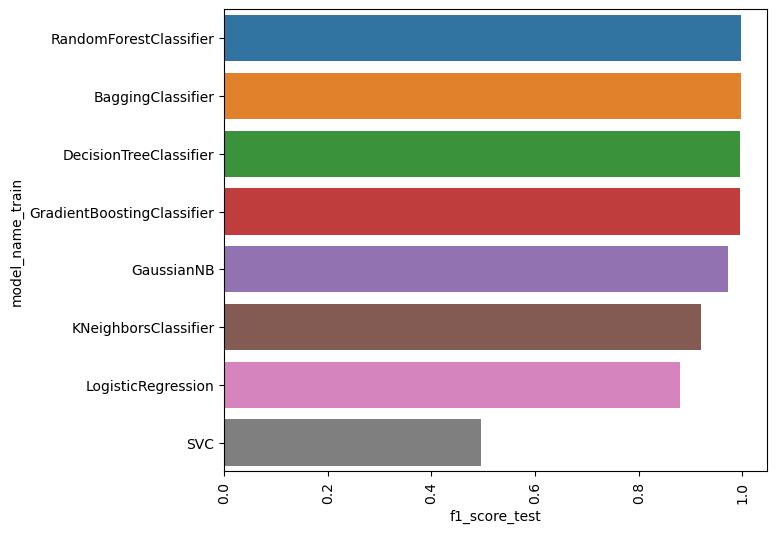

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(y=summary['model_name_train'],x=summary['f1_score_test'])
plt.xticks(rotation=90)
plt.show()

## Model Selection For Task-1

* From the above graph it is found that the RandomForestClassifier,BaggingClassifier,DecisionTreeClassifier & GradientBoostingClassifier performing well compared to other algorithms.

* And it is performing well above 95 percentage so not using optimization techniques separately.

* We are considering the GradientBoostingClassifier model over RandomForestClassifier, BaggingClassifier, DecisionTreeClassifier. As it performing better in more number of times compared to others.

* we will create the GradientBoostingClassifier model for further use.

In [ ]:
# Model creation
# Model initialization
high_priority_model=GradientBoostingClassifier()

# Fitting the model
high_priority_model.fit(X_train,y_train)

# Predicting using the model
high_priority_pred=high_priority_model.predict(X_test)

# Printing the confusion metrics and classification report
print('metrics on test data')
print('confusion matrix')
print(confusion_matrix(y_test,high_priority_pred))
print('\n')
print('classification report')
print(classification_report(y_test,high_priority_pred))
print('==='*10)


metrics on test data
confusion matrix
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 9127    0    0    0    0    0    0    0    0    0  776]
 [   0    0    1    0    0    0    0    0    0    0    0    0]
 [   1    0    0 1092    0    0    0    0    0    0    0    0]
 [   0    0    0    0   63    0    0    1    0    0    0    0]
 [   0    0    0    0    0   64    0    0    0    0    0    0]
 [   0    0    0    1    0    0  132    0    0    0    0    0]
 [   0    0    0    2    1    0    0   26    0    0    3    0]
 [   0    0    0    0    0    0    0    0   46    0    0    0]
 [   0    0    0    0    0    0    0    0    0  100    0    0]
 [   0    1    0    0    0    1    0    0    0    0  209    0]
 [   0 1401    0    0    0    0    0    0    0    0    0  934]]


classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.87      0.92      0.89      9903
           2      

In [ ]:
# Save the model
with open('high_priority_model.pkl', 'wb') as file:
    pickle.dump(high_priority_model, file)

<IPython.core.display.Javascript object>

## TASK-2 | FORECASTING
### 2. Forecast the incident volume in different fields , quarterly and annual. So that they can be better prepared                     with resources and technology planning.

## Data Preparation

In [ ]:
# Imporing the necessary columns
# Importing the necessary columns from  dataset, which include 'Incident_ID' and 'Open_Time'.
df_2 = df.loc[:,['Incident_ID','Open_Time']]

In [ ]:
df_2.head()

,Incident_ID,Open_Time
0,IM0000004,05-02-2012 13:32
1,IM0000005,12-03-2012 15:44
2,IM0000006,29-03-2012 12:36
3,IM0000011,17-07-2012 11:49
4,IM0000012,10-08-2012 11:01


In [ ]:
df_2.shape

(46606, 2)

In [ ]:
import datetime as dt

In [ ]:
# Define a function to parse the date formats
def parse_date(date_str):
    try:
        # Try to parse the date using one format
        return pd.to_datetime(date_str, format='%d/%m/%Y %H:%M')
    except ValueError:
        # If the first format fails, try the second format
        return pd.to_datetime(date_str, format='%d-%m-%Y %H:%M')

# Apply the function to the 'Open_Time' column
df_2['Open_Time'] = df_2['Open_Time'].apply(parse_date)

# Convert the 'Open_Time' column to the desired string format
df_2['Open_Time'] = df_2['Open_Time'].dt.strftime('%Y-%m-%d')

# Print the modified DataFrame
df_2

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10
...,...,...
46601,IM0047053,2014-03-31
46602,IM0047054,2014-03-31
46603,IM0047055,2014-03-31
46604,IM0047056,2014-03-31


In [ ]:
#The 'Open_Time' column contained dates in different formats, so wrote a function to parse the dates correctly.

In [ ]:
df_2.head()

,Incident_ID,Open_Time
0,IM0000004,2012-02-05
1,IM0000005,2012-03-12
2,IM0000006,2012-03-29
3,IM0000011,2012-07-17
4,IM0000012,2012-08-10


## Exploratory Data Analysis

In [ ]:
# Adding a new column which will have the number of tickets per day
df_2['No_Incidents'] = df_2.groupby('Open_Time')['Incident_ID'].transform('count')

In [ ]:
df_2.drop(['Incident_ID'],axis=1,inplace=True)

In [ ]:
# After converting the dates to a consistent format, we created a new DataFrame with the 'Incident_ID' column removed.
df_2.head()

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-08-10,2


In [ ]:
df_2.duplicated().sum()

46275

In [ ]:
df_2.drop_duplicates(inplace=True)

In [ ]:
# calculated the number of incidents per day and found that there were duplicate values in the dataset.
# After removing duplicates, we set the 'Open_Time' as the index and checked the date range.
df_2

,Open_Time,No_Incidents
0,2012-02-05,1
1,2012-03-12,1
2,2012-03-29,1
3,2012-07-17,1
4,2012-08-10,2
...,...,...
45857,2014-03-27,269
46154,2014-03-28,205
46354,2014-03-29,5
46386,2014-03-30,3


In [ ]:
# Setting Date as the Index
df_2 = df_2.set_index('Open_Time')
df_2.index = pd.to_datetime(df_2.index)
df_2.index

DatetimeIndex(['2012-02-05', '2012-03-12', '2012-03-29', '2012-07-17',
               '2012-08-10', '2012-08-15', '2012-08-22', '2012-08-29',
               '2012-09-03', '2012-09-21',
               ...
               '2014-03-22', '2014-03-24', '2014-03-23', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=331, freq=None)

In [ ]:
df_2.head()

,No_Incidents
Open_Time,
2012-02-05,1
2012-03-12,1
2012-03-29,1
2012-07-17,1
2012-08-10,2


In [ ]:
# Checking range of dates for our values
print(df_2.index.min(),'to',df_2.index.max())

2012-02-05 00:00:00 to 2014-03-31 00:00:00


In [ ]:
# Making a new Series with frequency as Day
data1 = df_2['No_Incidents']
data1 = data1.asfreq('D')
data1.index

DatetimeIndex(['2012-02-05', '2012-02-06', '2012-02-07', '2012-02-08',
               '2012-02-09', '2012-02-10', '2012-02-11', '2012-02-12',
               '2012-02-13', '2012-02-14',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=786, freq='D')

In [ ]:
data1.head()

Open_Time
2012-02-05    1.0
2012-02-06    NaN
2012-02-07    NaN
2012-02-08    NaN
2012-02-09    NaN
Freq: D, Name: No_Incidents, dtype: float64

## Data Analysis and Visualization

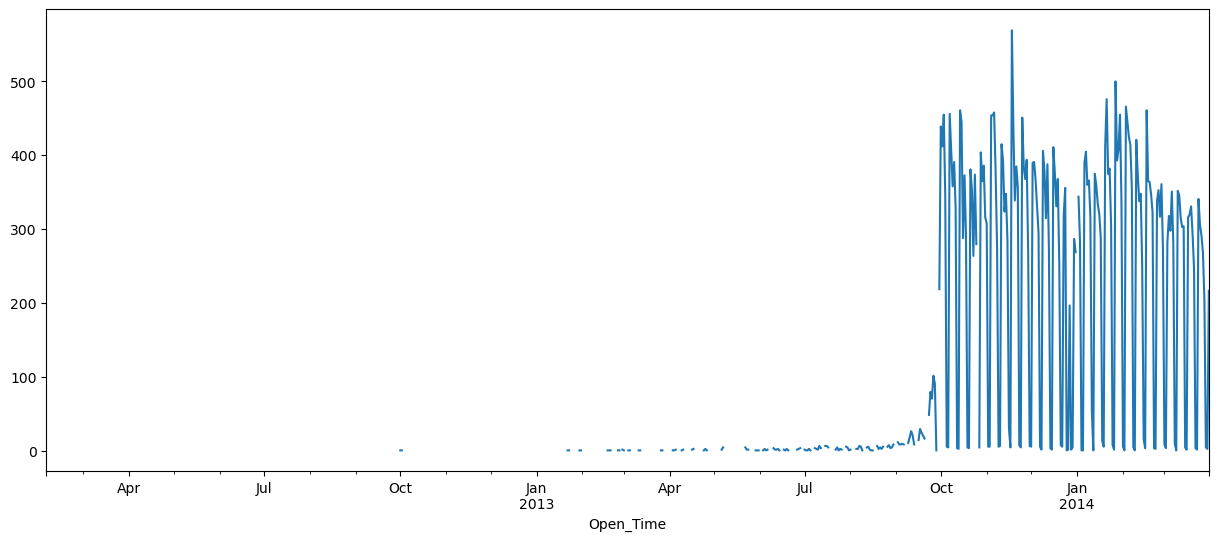

In [ ]:
# Plotting number of tickets per day
data1.plot(figsize=(15,6))
plt.show()

In [ ]:
# To better understand the incident volume, we created a time series plot of the number of tickets per day.
# From the plot, we noticed that there was a significant increase in incidents after October 2013.

In [ ]:
# Since not many tickets before October 2013, we consider only the latter values
incfrom2013 = df_2[df_2.index > dt.datetime(2013,10,1)]

In [ ]:
incfrom2013.head()

,No_Incidents
Open_Time,
2013-10-02,412
2013-10-03,455
2013-10-04,345
2013-10-07,456
2013-10-05,6


In [ ]:
# new Series
data2 = incfrom2013['No_Incidents']
data2 = data2.asfreq('D')
data2.index

DatetimeIndex(['2013-10-02', '2013-10-03', '2013-10-04', '2013-10-05',
               '2013-10-06', '2013-10-07', '2013-10-08', '2013-10-09',
               '2013-10-10', '2013-10-11',
               ...
               '2014-03-22', '2014-03-23', '2014-03-24', '2014-03-25',
               '2014-03-26', '2014-03-27', '2014-03-28', '2014-03-29',
               '2014-03-30', '2014-03-31'],
              dtype='datetime64[ns]', name='Open_Time', length=181, freq='D')

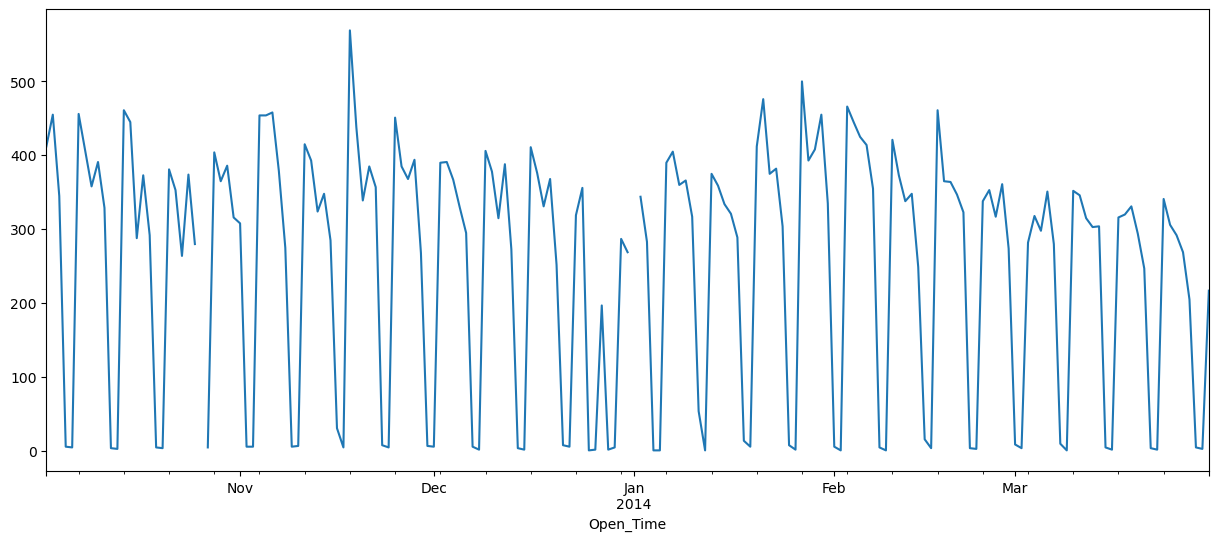

In [ ]:
# Plotting number of tickets per day after October 2013
data2.plot(figsize=(15,6))
plt.show()

### Time Series Forecasting

In [ ]:
import itertools
import statsmodels.api as sm

In [ ]:
# Making a list of values for p,d & q
p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))

In [ ]:
# Choosing the ARIMA Model
# Checking the AIC values per pairs
for param in pdq:
    mod = sm.tsa.statespace.SARIMAX(data2,order=param,enforce_stationarity=False,enforce_invertibility=False)
    results = mod.fit()
    print('ARIMA{} - AIC:{}'.format(param, results.aic))

ARIMA(0, 0, 0) - AIC:2539.6180293605685
ARIMA(0, 0, 1) - AIC:2373.785382472209
ARIMA(0, 1, 0) - AIC:2371.128960804689
ARIMA(0, 1, 1) - AIC:2313.1363347365786
ARIMA(1, 0, 0) - AIC:2365.2916469365655
ARIMA(1, 0, 1) - AIC:2337.3125086933514
ARIMA(1, 1, 0) - AIC:2373.128068065154
ARIMA(1, 1, 1) - AIC:2294.43158124368


In [ ]:
# Choosing the model with minimum AIC and the ARIMA Model for Time Series Forecasting
mod = sm.tsa.statespace.SARIMAX(data2,order=(1,1,1))
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.090      3.771      0.000       0.163       0.515
ma.L1         -0.9989      0.428     -2.332      0.020      -1.839      -0.159
sigma2       2.52e+04   9781.707      2.576      0.010    6023.561    4.44e+04


In [ ]:
# The summary of the selected ARIMA model (1,1,1) showed the coefficients for the autoregressive (AR) and moving average (MA) terms,
# As well as the sigma2 value representing the variance of the residuals.

In [ ]:
# Predicting the future values and the confidence interval
pred = results.get_prediction(start=pd.to_datetime('2014-3-3'),end=pd.to_datetime('2014-10-30'),dynamic=False)
pred_ci = pred.conf_int()
pred.predicted_mean.round()

2014-03-03    172.0
2014-03-04    266.0
2014-03-05    279.0
2014-03-06    272.0
2014-03-07    291.0
              ...  
2014-10-26    252.0
2014-10-27    252.0
2014-10-28    252.0
2014-10-29    252.0
2014-10-30    252.0
Freq: D, Name: predicted_mean, Length: 242, dtype: float64

In [ ]:
# Used the selected ARIMA model to predict future incident volumes.
# The predictions were made for the period from March 3, 2014, to October 30, 2014

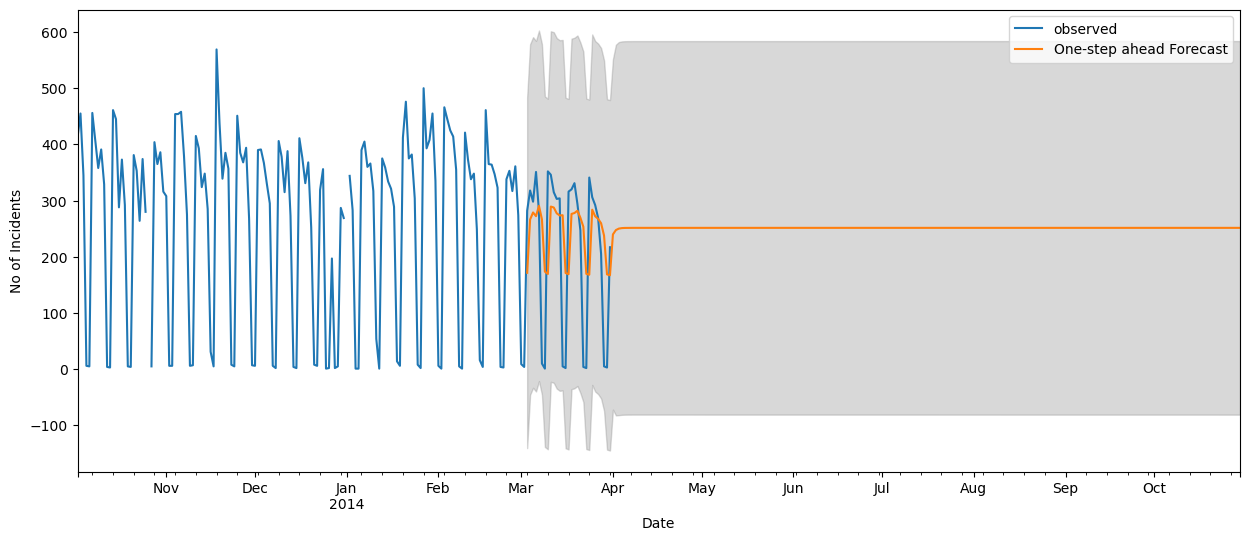

In [ ]:
ax = data2['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax,label='One-step ahead Forecast',figsize=(15, 6))
ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color='grey',alpha=0.3)
ax.set_xlabel('Date')
ax.set_ylabel('No of Incidents')
plt.legend()
plt.show()

In [ ]:
# The predicted incident volumes were plotted alongside the observed data for visualization.
# This allowed us to assess the model's performance in forecasting incident volumes

# Task 3
### 3.Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be                  reduced.

In [ ]:
df_3=data.copy()

In [ ]:
df_3.head()

,CI_Cat,CI_Subcat,Status,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,No_of_Related_Interactions,Handle_Time_hrs_conv
0,11,57,0,4,4,4.0,0.601292,1,0.0,1,8256.316667
1,1,57,0,3,3,3.0,0.415050,1,0.0,1,1700.866667
2,1,10,0,4,3,4.0,0.517551,3,3.0,1,7291.733333
3,1,57,0,4,4,4.0,0.642927,1,0.0,1,7291.733333
4,1,57,0,4,4,4.0,0.345258,1,2.0,1,7370.900000


In [ ]:
X1=df_3.drop(['Priority','CI_Cat','Urgency'],axis=1)

In [ ]:
X1.head()

,CI_Subcat,Status,Impact,number_cnt,Category,No_of_Reassignments,No_of_Related_Interactions,Handle_Time_hrs_conv
0,57,0,4,0.601292,1,0.0,1,8256.316667
1,57,0,3,0.415050,1,0.0,1,1700.866667
2,10,0,4,0.517551,3,3.0,1,7291.733333
3,57,0,4,0.642927,1,0.0,1,7291.733333
4,57,0,4,0.345258,1,2.0,1,7370.900000


In [ ]:
y1=df_3['Priority']

In [ ]:
y1.head()

0    4.0
1    3.0
2    4.0
3    4.0
4    4.0
Name: Priority, dtype: float64

In [ ]:
y1=y1.astype(int)

In [ ]:
y2=df_3['CI_Cat']
y2.value_counts()

CI_Cat
1     33010
11     7782
3      3643
10      703
6       442
9       333
4       214
5       212
8       152
7       107
2         5
0         2
Name: count, dtype: int64

## Function for model selection- Task-3

### Logic Behind The Function
* 1. First creating a dictionary with the name model_summary and initiating with null values with proper keys
* 2. Function called model_selection_1 will take model as parameter
* 3. Initially the model will be initiated within the function and will be stored in the variable called model
* 4. Model will be fitted on x_train and y_train
* 5. Model will first predict on test data
* 6. After prediction all the evaluation metric values will be appended to dictionary with corresponding key values.
* 7. Then it will print the confusion matrix and classification report of that model
* 8. The same steps will also the performed on train data

In [ ]:
model_summary_1={'model_name_train':[],'f1_score_train':[],'recall_score_train':[],'accuracy_score_train':[],
               'model_name_test':[],'f1_score_test':[],'recall_score_test':[],'accuracy_score_test':[]}


def model_selction_2(model):

    # Model init ialization ,fitting and predicting
    print(model)
    model=model()
    model.fit(X_train,y_train)
    model_pred=model.predict(X_test)

    # Appending the metrics to the dictionary created
    model_summary_1['model_name_test'].append(model.__class__.__name__)
    model_summary_1['f1_score_test'].append(f1_score(y_test,model_pred,average='macro'))
    model_summary_1['recall_score_test'].append(recall_score(y_test,model_pred,average='macro'))
    model_summary_1['accuracy_score_test'].append(accuracy_score(y_test,model_pred))

    # Printing the confusion metrics and classification report
    print('metrics on test data')
    print(confusion_matrix(y_test,model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))

    # Predictions on train data
    model_pred1=model.predict(X_train)

    # Appending the metrics to the dictionary created
    model_summary_1['model_name_train'].append(model.__class__.__name__)
    model_summary_1['f1_score_train'].append(f1_score(y_train,model_pred1,average='macro'))
    model_summary_1['recall_score_train'].append(recall_score(y_train,model_pred1,average='macro'))
    model_summary_1['accuracy_score_train'].append(accuracy_score(y_train,model_pred1))

    # Printing the confusion metrics and classification report
    print('metrics on train data')
    print(confusion_matrix(y_train,model_pred1))
    print('\n')
    print(classification_report(y_train,model_pred1))
    print('==='*10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42,stratify=y1)

In [ ]:
for i in models:
    model_selction_2(i)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
metrics on test data
[[   0    0    0    1    0]
 [   0    0    0   65  144]
 [   0    0    0 1180  417]
 [   0    0    0 6020 1209]
 [   0    0    0 2585 2361]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00       209
           3       0.00      0.00      0.00      1597
           4       0.61      0.83      0.70      7229
           5       0.57      0.48      0.52      4946

    accuracy                           0.60     13982
   macro avg       0.24      0.26      0.25     13982
weighted avg       0.52      0.60      0.55     13982

metrics on train data
[[    0     0     0     2     0]
 [    0     0     0   166   322]
 [    0     0     0  2758   968]
 [    0     0     0 14029  2839]
 [    0     0     0  6029  5510]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.0

metrics on test data
[[   0    0    0    1    0]
 [   0    0    0  209    0]
 [   0    0    0 1597    0]
 [   0    0    0 7229    0]
 [   0    0    0 4946    0]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00       209
           3       0.00      0.00      0.00      1597
           4       0.52      1.00      0.68      7229
           5       0.00      0.00      0.00      4946

    accuracy                           0.52     13982
   macro avg       0.10      0.20      0.14     13982
weighted avg       0.27      0.52      0.35     13982

metrics on train data
[[    0     0     0     2     0]
 [    0     0     0   488     0]
 [    0     0     0  3726     0]
 [    0     0     0 16868     0]
 [    0     0     0 11539     0]]


              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00     

In [ ]:
summary_1=pd.DataFrame(model_summary_1).sort_values('f1_score_test',ascending=False).drop('model_name_test',axis=1)

In [ ]:
summary_1

,model_name_train,f1_score_train,recall_score_train,accuracy_score_train,f1_score_test,recall_score_test,accuracy_score_test
7,GradientBoostingClassifier,0.996350,0.995716,0.994452,0.993070,0.991536,0.991918
5,GaussianNB,0.992917,0.990533,0.992030,0.992912,0.990616,0.991775
3,BaggingClassifier,0.999137,0.998891,0.998988,0.990922,0.989827,0.989630
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,0.988540,0.988371,0.986912
2,RandomForestClassifier,1.000000,1.000000,1.000000,0.792188,0.790622,0.990559
4,KNeighborsClassifier,0.738770,0.722150,0.935506,0.705238,0.688854,0.895437
0,LogisticRegression,0.244881,0.261841,0.598933,0.245027,0.262022,0.599414
6,SVC,0.136332,0.200000,0.517059,0.136325,0.200000,0.517022


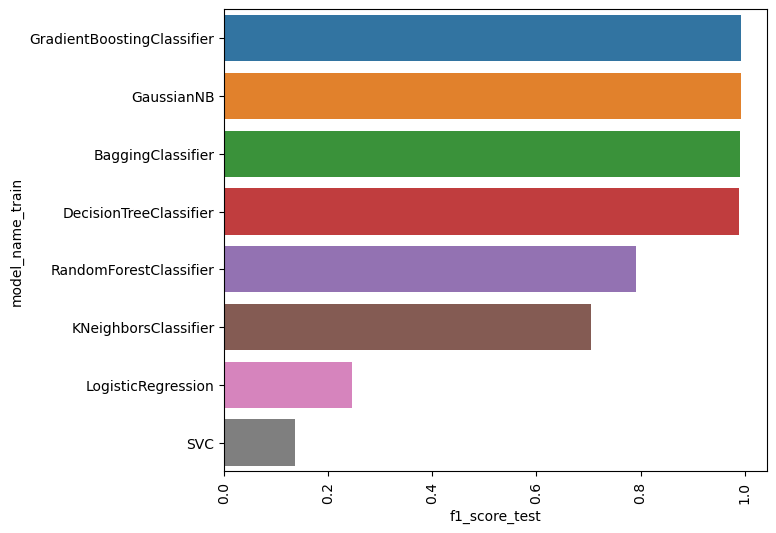

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(y=summary_1['model_name_train'],x=summary_1['f1_score_test'])
plt.xticks(rotation=90)
plt.show()

## Model Selection For Task-3: Auto Tag Ticket with Right Prority

* From the above graph it is found that the GradientBoostingClassifier,GaussianNB,BaggingClassifier & DecisionTreeClassifier model performing well compared to other algorithms.

* And it is performing well above 95 percentage so not using optimization techniques separately.

* We are considering the GradientBoostingClassifier model over,GaussianNB, BaggingClassifier & DecisionTreeClassifier . As it performing better in more number of times compared to others.

* we will create the GradientBoostingClassifier model for further use.

In [ ]:
# Model creation
# Model initialization
all_priority_model=GradientBoostingClassifier()

# Fitting the model
all_priority_model.fit(X_train,y_train)

# Predicting using the model
all_priority_pred=all_priority_model.predict(X_test)

# Printing the confusion metrics and classification report
print('metrics on test data')
print('confusion matrix')
print(confusion_matrix(y_test,all_priority_pred))
print('\n')
print('classification report')
print(classification_report(y_test,all_priority_pred))
print('==='*10)

metrics on test data
confusion matrix
[[   1    0    0    0    0]
 [   0  207    2    0    0]
 [   0    0 1562   33    2]
 [   0    0   13 7158   58]
 [   0    0    0    4 4942]]


classification report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      0.99      1.00       209
           3       0.99      0.98      0.98      1597
           4       0.99      0.99      0.99      7229
           5       0.99      1.00      0.99      4946

    accuracy                           0.99     13982
   macro avg       0.99      0.99      0.99     13982
weighted avg       0.99      0.99      0.99     13982



In [ ]:
# Save the model
with open('all_priority_model.pkl', 'wb') as file:
    pickle.dump(all_priority_model, file)

<IPython.core.display.Javascript object>

In [ ]:
model_summary_3={'model_name_train':[],'f1_score_train':[],'recall_score_train':[],'accuracy_score_train':[],
               'model_name_test':[],'f1_score_test':[],'recall_score_test':[],'accuracy_score_test':[]}


def model_selction_3(model):

    # Model initialization ,fitting and predicting
    print(model)
    model=model()
    model.fit(X_train,y_train)
    model_pred=model.predict(X_test)

    # Appending the metrics to the dictionary created
    model_summary_3['model_name_test'].append(model.__class__.__name__)
    model_summary_3['f1_score_test'].append(f1_score(y_test,model_pred,average='macro'))
    model_summary_3['recall_score_test'].append(recall_score(y_test,model_pred,average='macro'))
    model_summary_3['accuracy_score_test'].append(accuracy_score(y_test,model_pred))

    # Printing the confusion metrics and classification report
    print('metrics on test data')
    print(confusion_matrix(y_test,model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))

    # Predictions on train data
    model_pred1=model.predict(X_train)

    # Appending the metrics to the dictionary created
    model_summary_3['model_name_train'].append(model.__class__.__name__)
    model_summary_3['f1_score_train'].append(f1_score(y_train,model_pred1,average='macro'))
    model_summary_3['recall_score_train'].append(recall_score(y_train,model_pred1,average='macro'))
    model_summary_3['accuracy_score_train'].append(accuracy_score(y_train,model_pred1))

    # Printing the confusion metrics and classification report
    print('metrics on train data')
    print(confusion_matrix(y_train,model_pred1))
    print('\n')
    print(classification_report(y_train,model_pred1))
    print('==='*10)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, y2, test_size=0.3, random_state=42,stratify=y2)

In [ ]:
for i in models:
    model_selction_3(i)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
metrics on test data
[[9674    0  229    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0]
 [ 931    0  162    0    0    0    0    0    0    0    0]
 [  64    0    0    0    0    0    0    0    0    0    0]
 [  64    0    0    0    0    0    0    0    0    0    0]
 [ 108    0   25    0    0    0    0    0    0    0    0]
 [  32    0    0    0    0    0    0    0    0    0    0]
 [  46    0    0    0    0    0    0    0    0    0    0]
 [  87    0   13    0    0    0    0    0    0    0    0]
 [ 185    0   26    0    0    0    0    0    0    0    0]
 [2309    0   26    0    0    0    0    0    0    0    0]]


              precision    recall  f1-score   support

           1       0.72      0.98      0.83      9903
           2       0.00      0.00      0.00         1
           3       0.34      0.15      0.21      1093
           4       0.00      0.00      0.00        64
       

metrics on train data
[[    2     0     0     0     0     0     0     0     0     0     0     0]
 [    0 23107     0     0     0     0     0     0     0     0     0     0]
 [    0     0     4     0     0     0     0     0     0     0     0     0]
 [    0     0     0  2550     0     0     0     0     0     0     0     0]
 [    0     0     0     0   150     0     0     0     0     0     0     0]
 [    0     0     0     0     0   148     0     0     0     0     0     0]
 [    0     0     0     0     0     0   309     0     0     0     0     0]
 [    0     0     0     0     0     0     0    75     0     0     0     0]
 [    0     0     0     0     0     0     0     0   106     0     0     0]
 [    0     0     0     0     0     0     0     0     0   233     0     0]
 [    0     0     0     0     0     0     0     0     0     0   492     0]
 [    0     6     0     0     0     0     0     0     0     0     0  5441]]


              precision    recall  f1-score   support

           0       1

metrics on test data
[[9903    0    0    0    0    0    0    0    0    0    0]
 [   1    0    0    0    0    0    0    0    0    0    0]
 [1093    0    0    0    0    0    0    0    0    0    0]
 [  64    0    0    0    0    0    0    0    0    0    0]
 [  64    0    0    0    0    0    0    0    0    0    0]
 [ 133    0    0    0    0    0    0    0    0    0    0]
 [  32    0    0    0    0    0    0    0    0    0    0]
 [  46    0    0    0    0    0    0    0    0    0    0]
 [ 100    0    0    0    0    0    0    0    0    0    0]
 [ 211    0    0    0    0    0    0    0    0    0    0]
 [2335    0    0    0    0    0    0    0    0    0    0]]


              precision    recall  f1-score   support

           1       0.71      1.00      0.83      9903
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00      1093
           4       0.00      0.00      0.00        64
           5       0.00      0.00      0.00        64
           6 

In [ ]:
summary_3=pd.DataFrame(model_summary_3).sort_values('f1_score_test',ascending=False).drop('model_name_test',axis=1)

In [ ]:
summary_3

,model_name_train,f1_score_train,recall_score_train,accuracy_score_train,f1_score_test,recall_score_test,accuracy_score_test
3,BaggingClassifier,0.909891,0.907369,0.980137,0.919737,0.915050,0.820340
7,GradientBoostingClassifier,0.949324,0.946550,0.850995,0.849647,0.841717,0.843513
1,DecisionTreeClassifier,1.000000,1.000000,1.000000,0.842415,0.839845,0.803605
2,RandomForestClassifier,0.999943,0.999908,0.999816,0.737402,0.710608,0.805750
4,KNeighborsClassifier,0.678338,0.627192,0.859271,0.684265,0.627281,0.805178
5,GaussianNB,0.343875,0.385674,0.656255,0.282342,0.322623,0.658418
0,LogisticRegression,0.088552,0.095747,0.704595,0.093867,0.102281,0.703476
6,SVC,0.069104,0.083333,0.708304,0.075384,0.090909,0.708268


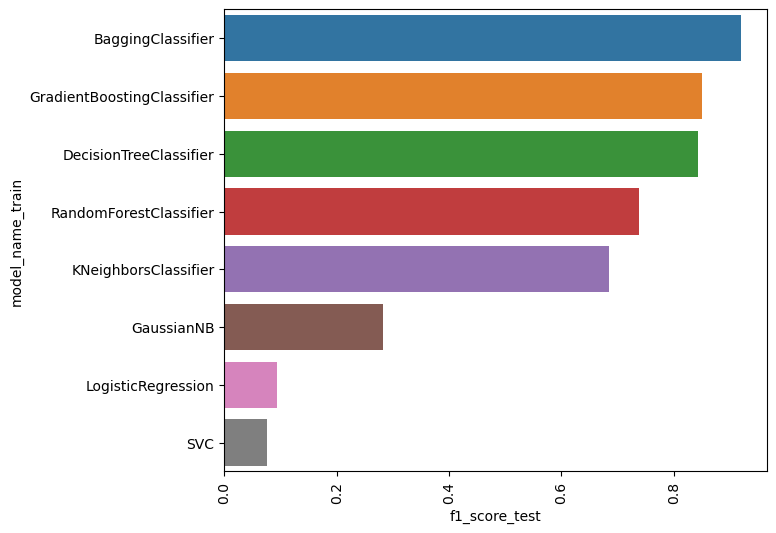

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(y=summary_3['model_name_train'],x=summary_3['f1_score_test'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Model creation
# Model initialization
department_classification_model=GradientBoostingClassifier()

# Fitting the model
department_classification_model.fit(X_train,y_train)

# Predicting using the model
department_classification_pred=department_classification_model.predict(X_test)

# Printing the confusion metrics and classification report
print('metrics on test data')
print('confusion matrix')
print(confusion_matrix(y_test,department_classification_pred))
print('\n')
print('classification report')
print(classification_report(y_test,department_classification_pred))
print('==='*10)

metrics on test data
confusion matrix
[[   0    0    0    0    0    0    0    0    0    0    0    0]
 [   0 9127    0    0    0    0    0    0    0    0    0  776]
 [   0    0    1    0    0    0    0    0    0    0    0    0]
 [   1    0    0 1092    0    0    0    0    0    0    0    0]
 [   0    0    0    0   63    0    0    1    0    0    0    0]
 [   0    0    0    0    0   64    0    0    0    0    0    0]
 [   0    0    0    1    0    0  132    0    0    0    0    0]
 [   0    0    0    2    1    0    0   26    0    0    3    0]
 [   0    0    0    0    0    0    0    0   46    0    0    0]
 [   0    0    0    0    0    0    0    0    0  100    0    0]
 [   0    1    0    0    0    1    0    0    0    0  209    0]
 [   0 1400    0    0    0    0    0    0    0    0    0  935]]


classification report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.87      0.92      0.89      9903
           2      

In [ ]:
# Save the model
with open('department_classification_model.pkl', 'wb') as file:
    pickle.dump(department_classification_model, file)

<IPython.core.display.Javascript object>

# Task 4
### 4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

In [ ]:
df.shape

(46606, 25)

In [ ]:
df_4=df.loc[:,['CI_Subcat','WBS','Priority','Category','No_of_Related_Interactions','No_of_Related_Incidents','No_of_Related_Changes']]

In [ ]:
df_4.head()

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,Web Based Application,WBS000162,4,incident,1,2,
1,Web Based Application,WBS000088,3,incident,1,1,
2,Desktop Application,WBS000092,NA,request for information,1,,
3,Web Based Application,WBS000088,4,incident,1,,
4,Web Based Application,WBS000088,4,incident,1,,


In [ ]:
# Define categorical,numerical columns:
categorical_columns = ['CI_Subcat', 'WBS', 'Category']

numerical_columns=['Priority',
                   'No_of_Related_Interactions', 'No_of_Related_Incidents','No_of_Related_Changes']


# Convert categorical columns to 'object' dtype
df_4[categorical_columns] = df_4[categorical_columns].astype('object')

# Convert numerical columns to 'float' or 'int' dtype (coerce errors for invalid parsing)
df_4[numerical_columns] = df_4[numerical_columns].apply(pd.to_numeric, errors='coerce')



In [ ]:
df_4.head()

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,Web Based Application,WBS000162,4.0,incident,1.0,2.0,NaN
1,Web Based Application,WBS000088,3.0,incident,1.0,1.0,NaN
2,Desktop Application,WBS000092,NaN,request for information,1.0,NaN,NaN
3,Web Based Application,WBS000088,4.0,incident,1.0,NaN,NaN
4,Web Based Application,WBS000088,4.0,incident,1.0,NaN,NaN


In [ ]:
df_4.isnull().sum()

CI_Subcat                         0
WBS                               0
Priority                       1380
Category                          0
No_of_Related_Interactions      114
No_of_Related_Incidents       45384
No_of_Related_Changes         46046
dtype: int64

In [ ]:
df_4["Priority"].median()

4.0

In [ ]:
df_4.loc[df_4["Priority"].isnull(),"Priority"] = df_4['Priority'].median()

In [ ]:
df_4["No_of_Related_Interactions"].median()

1.0

In [ ]:
df_4.loc[df_4["No_of_Related_Interactions"].isnull(),"No_of_Related_Interactions"] = df_4['No_of_Related_Interactions'].median()

In [ ]:
df_4["No_of_Related_Incidents"].median()

1.0

In [ ]:
df_4.loc[df_4["No_of_Related_Incidents"].isnull(),"No_of_Related_Incidents"] = df_4['No_of_Related_Incidents'].median()

In [ ]:
df_4["No_of_Related_Changes"].median()

1.0

In [ ]:
df_4.loc[df_4["No_of_Related_Changes"].isnull(),"No_of_Related_Changes"] = df_4['No_of_Related_Changes'].median()

In [ ]:
df_4.isnull().sum()

CI_Subcat                     0
WBS                           0
Priority                      0
Category                      0
No_of_Related_Interactions    0
No_of_Related_Incidents       0
No_of_Related_Changes         0
dtype: int64

In [ ]:
df_4.head()

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
0,Web Based Application,WBS000162,4.0,incident,1.0,2.0,1.0
1,Web Based Application,WBS000088,3.0,incident,1.0,1.0,1.0
2,Desktop Application,WBS000092,4.0,request for information,1.0,1.0,1.0
3,Web Based Application,WBS000088,4.0,incident,1.0,1.0,1.0
4,Web Based Application,WBS000088,4.0,incident,1.0,1.0,1.0


In [ ]:
df_4["No_of_Related_Changes"].value_counts()

No_of_Related_Changes
1.0    46582
2.0       21
3.0        2
9.0        1
Name: count, dtype: int64

In [ ]:
df_4.loc[df_4['No_of_Related_Changes']==3.0]

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
360,Web Based Application,WBS000088,4.0,incident,1.0,1.0,3.0
42082,Web Based Application,WBS000302,4.0,incident,1.0,1.0,3.0


In [ ]:
df_4.drop(df_4.loc[df_4['No_of_Related_Changes']==3.0].index,inplace=True)  # As there were 2 records in this category.

In [ ]:
df_4.loc[df_4['No_of_Related_Changes']==9.0]

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents,No_of_Related_Changes
24182,Web Based Application,WBS000015,3.0,incident,2.0,2.0,9.0


In [ ]:
df_4.drop(df_4.loc[df_4['No_of_Related_Changes']==9.0].index,inplace=True) # As there was only 1 record in this category.

In [ ]:
df_4["No_of_Related_Changes"].value_counts()

No_of_Related_Changes
1.0    46582
2.0       21
Name: count, dtype: int64

In [ ]:
X4=df_4.drop(["No_of_Related_Changes"],axis=1)
y4=df_4["No_of_Related_Changes"]

In [ ]:
X4.head()

,CI_Subcat,WBS,Priority,Category,No_of_Related_Interactions,No_of_Related_Incidents
0,Web Based Application,WBS000162,4.0,incident,1.0,2.0
1,Web Based Application,WBS000088,3.0,incident,1.0,1.0
2,Desktop Application,WBS000092,4.0,request for information,1.0,1.0
3,Web Based Application,WBS000088,4.0,incident,1.0,1.0
4,Web Based Application,WBS000088,4.0,incident,1.0,1.0


In [ ]:
y4.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: No_of_Related_Changes, dtype: float64

In [ ]:
X4.shape

(46603, 6)

In [ ]:
y4.shape

(46603,)

In [ ]:
encoder=LabelEncoder()
for i in (0,1,3):
    X4.iloc[:,i] = encoder.fit_transform(X4.iloc[:,i])

In [ ]:
y4.value_counts()

No_of_Related_Changes
1.0    46582
2.0       21
Name: count, dtype: int64

In [ ]:
# Data  present in our dependent feature (No_of_Related_Changes) are totally imbalanced.
#To overcome this problem we use Oversampling to balanced the data .

In [ ]:
# We use RandomOverSampler to handle imbalanced data.
# Importing Necessary libraries
import imblearn
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler

In [ ]:
os=RandomOverSampler(sampling_strategy=1)

In [ ]:
X4_res,y4_res=os.fit_resample(X4,y4)

In [ ]:
X4_res.shape

(93164, 6)

In [ ]:
y4_res.shape

(93164,)

In [ ]:
y4_res.value_counts()

No_of_Related_Changes
1.0    46582
2.0    46582
Name: count, dtype: int64

In [ ]:
# Splitting the Data into train and test for calculating the accuracy
X4_train, X4_test, y4_train, y4_test = train_test_split(X4_res,y4_res,test_size=0.3,random_state=10)

In [ ]:
# Standardization technique is used
sc = StandardScaler()
X4_train = sc.fit_transform(X4_train)
X4_test = sc.transform(X4_test)

<IPython.core.display.Javascript object>

In [ ]:
X4_train.shape

(65214, 6)

In [ ]:
X4_test.shape

(27950, 6)

In [ ]:
model_summary_4={'model_name_train':[],'f1_score_train':[],'recall_score_train':[],'accuracy_score_train':[],
               'model_name_test':[],'f1_score_test':[],'recall_score_test':[],'accuracy_score_test':[]}


def model_selction_4(model):

    # Model initialization ,fitting and predicting
    print(model)
    model=model()
    model.fit(X4_train,y4_train)
    model_pred=model.predict(X4_test)

    # Appending the metrics to the dictionary created
    model_summary_4['model_name_test'].append(model.__class__.__name__)
    model_summary_4['f1_score_test'].append(f1_score(y4_test,model_pred,average='macro'))
    model_summary_4['recall_score_test'].append(recall_score(y4_test,model_pred,average='macro'))
    model_summary_4['accuracy_score_test'].append(accuracy_score(y4_test,model_pred))

    # Printing the confusion metrics and classification report
    print('metrics on test data')
    print(confusion_matrix(y4_test,model_pred))
    print('\n')
    print(classification_report(y4_test,model_pred))

    # Predictions on train data
    model_pred1=model.predict(X4_train)

    # Appending the metrics to the dictionary created
    model_summary_4['model_name_train'].append(model.__class__.__name__)
    model_summary_4['f1_score_train'].append(f1_score(y4_train,model_pred1,average='macro'))
    model_summary_4['recall_score_train'].append(recall_score(y4_train,model_pred1,average='macro'))
    model_summary_4['accuracy_score_train'].append(accuracy_score(y4_train,model_pred1))

    # Printing the confusion metrics and classification report
    print('metrics on train data')
    print(confusion_matrix(y4_train,model_pred1))
    print('\n')
    print(classification_report(y4_train,model_pred1))
    print('==='*10)

In [ ]:
for i in models:
    model_selction_4(i)

<class 'sklearn.linear_model._logistic.LogisticRegression'>
metrics on test data
[[ 7614  6320]
 [ 3342 10674]]


              precision    recall  f1-score   support

         1.0       0.69      0.55      0.61     13934
         2.0       0.63      0.76      0.69     14016

    accuracy                           0.65     27950
   macro avg       0.66      0.65      0.65     27950
weighted avg       0.66      0.65      0.65     27950

metrics on train data
[[17761 14887]
 [ 7823 24743]]


              precision    recall  f1-score   support

         1.0       0.69      0.54      0.61     32648
         2.0       0.62      0.76      0.69     32566

    accuracy                           0.65     65214
   macro avg       0.66      0.65      0.65     65214
weighted avg       0.66      0.65      0.65     65214

<class 'sklearn.tree._classes.DecisionTreeClassifier'>
metrics on test data
[[13508   426]
 [    0 14016]]


              precision    recall  f1-score   support

         1.0 

In [ ]:
summary_4=pd.DataFrame(model_summary_4).sort_values('f1_score_test',ascending=False).drop('model_name_test',axis=1)

In [ ]:
summary_4

,model_name_train,f1_score_train,recall_score_train,accuracy_score_train,f1_score_test,recall_score_test,accuracy_score_test
2,RandomForestClassifier,0.984893,0.984915,0.984896,0.984933,0.984893,0.984937
1,DecisionTreeClassifier,0.984893,0.984915,0.984896,0.984753,0.984714,0.984758
3,BaggingClassifier,0.984878,0.984900,0.984881,0.984718,0.984678,0.984723
4,KNeighborsClassifier,0.984801,0.984823,0.984804,0.984718,0.984678,0.984723
7,GradientBoostingClassifier,0.962382,0.962479,0.962431,0.961257,0.961210,0.961324
6,SVC,0.892235,0.892708,0.892630,0.890462,0.890704,0.890877
0,LogisticRegression,0.647724,0.651898,0.651762,0.650118,0.653996,0.654311
5,GaussianNB,0.351604,0.508469,0.507851,0.354848,0.509545,0.510984


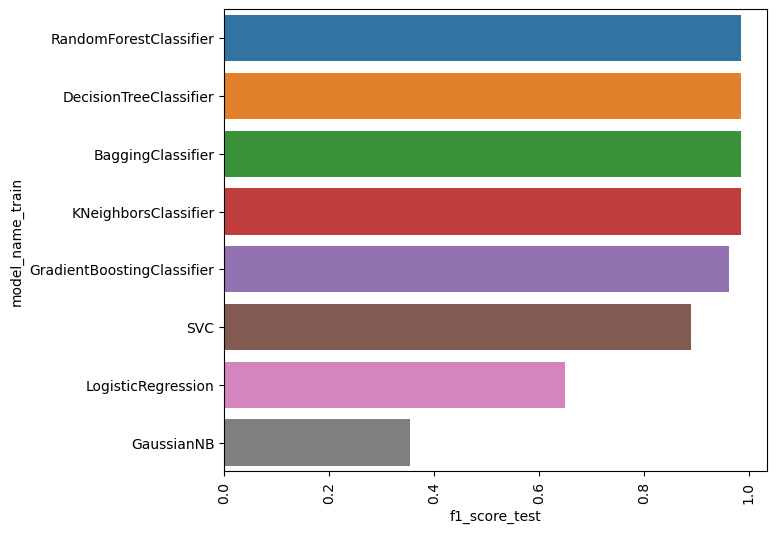

In [ ]:
plt.figure(figsize=(7,6))
sns.barplot(y=summary_4['model_name_train'],x=summary_4['f1_score_test'])
plt.xticks(rotation=90)
plt.show()

## Model Selection For Task-4

* From the above graph it is found that the RandomForestClassifier,BaggingClassifier,DecisionTreeClassifier & KNeighborsClassifier performing well compared to other algorithms.

* And it is performing well above 95 percentage so not using optimization techniques separately.

* We are considering the RandomForestClassifier model over, BaggingClassifier, DecisionTreeClassifier & KNeighborsClassifier. As it performing better in more number of times compared to others.

* we will create the RandomForestClassifier model for further use.

In [ ]:
# Model creation
# Model initialization
category_classification_model=RandomForestClassifier()

# Fitting the model
category_classification_model.fit(X4_train,y4_train)

# Predicting using the model
category_classification_pred=category_classification_model.predict(X4_test)

# Printing the confusion metrics and classification report
print('metrics on test data')
print('confusion matrix')
print(confusion_matrix(y4_test,category_classification_pred))
print('\n')
print('classification report')
print(classification_report(y4_test,category_classification_pred))
print('==='*10)

metrics on test data
confusion matrix
[[13512   422]
 [    0 14016]]


classification report
              precision    recall  f1-score   support

         1.0       1.00      0.97      0.98     13934
         2.0       0.97      1.00      0.99     14016

    accuracy                           0.98     27950
   macro avg       0.99      0.98      0.98     27950
weighted avg       0.99      0.98      0.98     27950



In [ ]:
# Save the model
with open('possible_failure.pkl', 'wb') as file:
    pickle.dump(category_classification_model, file)

<IPython.core.display.Javascript object>

[Click to view - Project Report](https://drive.google.com/file/d/1JpQhDHH7t9VOYnS0kl4qVDPOLNHmnzfh/view?usp=sharing)

## **PTID-CDS-MAR-24-1870 Team Info:**

## 1. Dipanjali Patra
* (01-MAY-23-CDS-ONL-BUN-021-WDE20)
* email: satyas.behera@gmail.com / dipanjalipatra@gmail.com

## 2. Vinay C
* (09-Oct-23-CDS-BUN-021-WDE20-ONL)
* email: vinayvinay9617@gmail.com

## 3. Sandeep Chandra Sagar R
* (09-Oct-23-CDS-BUN-021-WDE20-ONL)
* email: sanwithdeep@gmail.com


